<h1><font color=red face=gabriola>Scenario : </font></h1>
<font face=verdona>    While rounding "Alpha Centauri" en route to its first destination—"the torrid 55 Cancri E"—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<h1><font color=red face=gabriola>Task :</font></h1>
    To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.
    
-----------------------------------------------------------------------------------------------------------------------------------------------

<h1><font color=red face=gabriola>Data info: </font></h1>
<font face=verdona>  
 train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.<br>
 
<b>PassengerId</b> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling 
embsp; with and pp is their number within the group. People in a group are often family members, but not always.<br>
<b>HomePlanet</b> - The planet the passenger departed from, typically their planet of permanent residence.<br>
<b>CryoSleep</b> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.Passengers in cryosleep are confined to their cabins.<br>
<b>Cabin</b> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>
<b>Destination</b> - The planet the passenger will be debarking to.<br>
<b>Age</b> - The age of the passenger.<br>
<b>VIP</b> - Whether the passenger has paid for special VIP service during the voyage.<BR>
<B>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</B> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>
<b>Name</b> - The first and last names of the passenger.<br>
<b>Transported</b> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br>

test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

<b>sample_submission.csv</b> - A submission file in the correct format.<br>
<b>PassengerId</b> - Id for each passenger in the test set.<br>
<b>Transported</b> - The target. For each passenger, predict either True or False.<br>
    
-----------------------------------------------------------------------------------------------------------------------------------------------

<h1><font color=red face=gabriola> Approach : </font></h1>
<font face=verdona>  
(Remember these are not in order but each feature will go through all preprocessing till it is completely fit for the final data)<br>

<h2><font color=orange face=gabriola> Feature Engineering :</font></h2> <br>
<ol>
    <li>Passengerid - As passenger id has group and no. of the group member we will divide it in group and group member no. seperately</li>
    <li>HomePlanet and Destination - can be grouped in a new column to check corr between planets tuple and target</li>
    <li>Cabin - Has the deck, number and side which can again be divided into 3 seperate features.</li>
    <li>Age - Can form buckets of range as per EDA visuals .</li>
    <li>Name - First Name and Last Name to be seperated into two groups(As Last names will tell us whether family members or friends.)</li></ol>

<h2><font color=orange face=gabriola> Data Preprocessing :</font></h2> <br><ol>
    <li>Cabin - after division into deck number and side will will further apply OHE on Side as it is further divided into to types of Sides(P(Port) and S(Starboard)).</li>
    <li>Room Service,SPA, FoodCourt, ShoppingMall - transforming into binary variables based on amount paid in respective features (as they lead us whether the passenger was busy in something and not late to react)</li>
    <li>Categoric to Numeric, Null filing based on EDA , dropping duplicated rows, dropping constant columns, Outlier handling</li>
    </ol>
<h2><font color=orange face=gabriola>EDA :</font></h2> <br><ol>
    <li>Passengerid -<ul><li>①Group- We will check if the ppl in Groups are more prone to be transported or not (Countplots)<br>
                        We can further divide the groups as Family group or Friend group and check the corr. (Countplots)</li>
                  <li>②Number of the member- According to the number of the member the seating may be designed which again leads to corr. visualization (Scatterplot) </li></ul></li>
    <li>HomePlanet and Destination -This tuple can be used to see whether a trip begining from a planet x goes to a
                                    specific planet or not. If it does then we will creat a new feature with trip or journey . Now we will check the corr of the new feature.(Countplot)</li>
    <li>CyroSleep and Deck,Number,Side(P, S) - we will check corr. among these along with the target. (Countplot, 
                                            Histograms, Jointplots, Pairplot)</li>
    <li>Age - Visualize the buckets of age or Age as a continous val has a better correlation with the Target.(Countplot, 
            Histograms)</li>
    <li>Vip and RoomService, FoodCourt, ShoppingMall, Spa,VRDeck - will see do Vips spend more or less and all of the cols 
                                                                corr. with the Target</li>
    <li>Name - Last Names can be useful to say family members / friends who are more transported.</li>

<B>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h1><font color=arial><center>Importing Data

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## <font color=red>Checking for duplicate records

In [2]:
train[train.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


No duplicated records

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


<h1><font color=arial><center>Feature Engineering 

<h2> <font color=red>Passengerid </font></h2>
<pre>
Format - gggg(group number)_pp(Number of the person in the group)
Example- 0001(group number=1)__01(1st person of the group 0001)
         0001(group number=1)__02(2nd person of the group 0001)</pre>

Now we can create two seperate features from the PassengerId.


In [6]:
train[['Group_number','Member_number']] = train['PassengerId'].str.split('_', n=1, expand=True)    
train['Group_number'] = train['Group_number'].astype(int)
train['Member_number'] = train['Member_number'].astype(int)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group_number,Member_number
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1


<h2> <font color=red>Cabin</h2>
<pre>
    Format - X(Deck)/00(Number)/Y(Side)
    Example- A(Deck=A)/01(Number=1)/P(Side=P)</pre>

Now we can create three seperate features from the PassengerId.

In [7]:
train[['Deck', 'Number', 'Side']] = train['Cabin'].str.split('/', n=2, expand=True)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group_number,Member_number,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S


<h2> <font color=red> Side</font></h2>
mapping Side as there are only two classes in Side variable

In [8]:
import numpy as np
train[['Side', 'Side_Nan']] = pd.get_dummies(train['Side'],dummy_na=True,  drop_first=True)
train['Side'] = np.where(train['Side_Nan']==1, np.nan, train['Side'])
train.drop(['Side_Nan'], axis=1, inplace=True)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group_number,Member_number,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,1.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,1.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,1.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,1.0


<h3> EDA on Age (for feature eng.)

<Axes: xlabel='Age', ylabel='Count'>

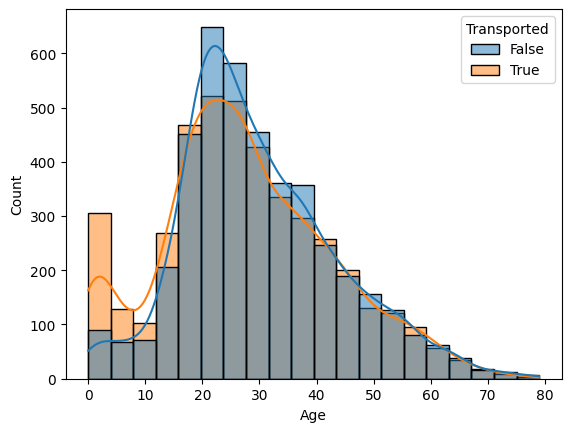

In [9]:
import seaborn as sns
sns.histplot(x=train['Age'], hue=train['Transported'], kde=True, bins=20)

<pre> I believe a bucket of range 20 would be appropriate .

In [10]:
import pandas as pd

# Assuming train is your DataFrame and 'Age' is a column in it
bins = [0, 20, 40, 60, float('inf')]  # Define the bin edges
labels = ['1-20', '21-40', '41-60', '61-80']  # Labels for the bins

train['Age_bucket'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)


<pre> Please Note : The bucket 1 to 20 actually consists from 0 to 20, it is just labelled 1 to 20 

<Axes: xlabel='Age_bucket', ylabel='count'>

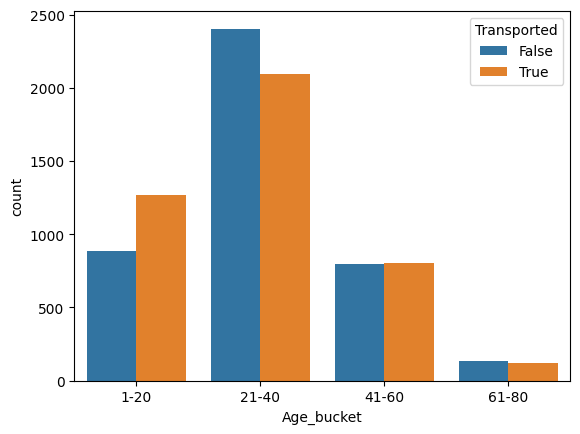

In [11]:
sns.countplot(x=train['Age_bucket'], hue=train['Transported'])

<pre> As per the Countplot above, We should group 40 to 60 and 60 to 80 in a single bucket as the ratio is same and last bucket has few values.

<Axes: xlabel='Age_bucket', ylabel='count'>

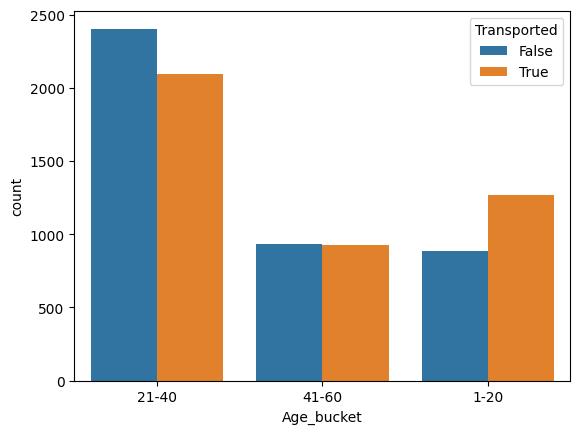

In [12]:
import numpy as np
train['Age_bucket'] = np.where(train['Age_bucket'] == '61-80', '41-60', train['Age_bucket'])
sns.countplot(x=train['Age_bucket'], hue=train['Transported'])

<pre> Now to buckets seem to be fine. Labelling age buckets as 'children' : 0 to 20, 'teenager': 20 to 40, 'adult': 40 to 60

In [13]:
train['Age_bucket'] = np.where(train['Age_bucket'] == '1-20', 'children',
                        np.where(train['Age_bucket'] == '21-40', 'teenager', 
                            np.where(train['Age_bucket'].notna(), 'adult',train['Age_bucket'])))
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group_number,Member_number,Deck,Number,Side,Age_bucket
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,0.0,teenager
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,1.0,teenager
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,1.0,adult
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,1.0,teenager
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,1.0,children


<h2> <font color=red> Age</font></h2> 
<pre>
Age->Age_buckets->children 
                ->teenagers(if both null adult)
                
So now we have four features(Age, Age_buckets, children, teenager) to decide which feature supports model best for
Target feature.

In [14]:
new_df = pd.DataFrame(pd.get_dummies(train['Age_bucket'],dummy_na=True, drop_first=True))
new_df['teenager'] = np.where(new_df.iloc[:,2]==1, np.nan, new_df['teenager'])
new_df['teenager'].isnull().sum()
new_df['children'] = np.where(new_df.iloc[:,2]==1, np.nan, new_df['children'])
new_df['children'].isnull().sum()
train_new =pd.concat([train, new_df[['children','teenager']]], axis=1)
train_new.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Group_number,Member_number,Deck,Number,Side,Age_bucket,children,teenager
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,1,1,B,0,0.0,teenager,0.0,1.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,2,1,F,0,1.0,teenager,0.0,1.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,3,1,A,0,1.0,adult,0.0,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,3,2,A,0,1.0,teenager,0.0,1.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,4,1,F,1,1.0,children,1.0,0.0


<h2> <font color=red> Name</font></h2>
 Name-> First Name & Last Name

In [15]:
train_new[[ 'First Name', 'Last Name']] = train_new['Name'].str.split(' ', n=1, expand=True)
train_new.head(6)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Group_number,Member_number,Deck,Number,Side,Age_bucket,children,teenager,First Name,Last Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,1,B,0,0.0,teenager,0.0,1.0,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,2,1,F,0,1.0,teenager,0.0,1.0,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,3,1,A,0,1.0,adult,0.0,0.0,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,3,2,A,0,1.0,teenager,0.0,1.0,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,4,1,F,1,1.0,children,1.0,0.0,Willy,Santantines
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,...,5,1,F,0,0.0,adult,0.0,0.0,Sandie,Hinetthews


<h2> <font color=red> 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'</font></h2> as binary features

<pre>if 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' > 0 (if the passenger spends anywhere it will denote 1 in the binary column)

In [16]:
def binary_creator(data, col):
    data[col+'_bin'] = np.where(data[col].isnull(), np.nan, np.where(data[col]>0,1,0))
    return data[col+'_bin']

In [17]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in cols:
    train_new[i+'_bin'] = binary_creator(train_new, i)
train_new.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Age_bucket,children,teenager,First Name,Last Name,RoomService_bin,FoodCourt_bin,ShoppingMall_bin,Spa_bin,VRDeck_bin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,teenager,0.0,1.0,Maham,Ofracculy,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,teenager,0.0,1.0,Juanna,Vines,1.0,1.0,1.0,1.0,1.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,adult,0.0,0.0,Altark,Susent,1.0,1.0,0.0,1.0,1.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,teenager,0.0,1.0,Solam,Susent,0.0,1.0,1.0,1.0,1.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,children,1.0,0.0,Willy,Santantines,1.0,1.0,1.0,1.0,1.0


<h1><font color=arial><center> Data Cleaning and Preprocessing

In [18]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       8693 non-null   object 
 1   HomePlanet        8492 non-null   object 
 2   CryoSleep         8476 non-null   object 
 3   Cabin             8494 non-null   object 
 4   Destination       8511 non-null   object 
 5   Age               8514 non-null   float64
 6   VIP               8490 non-null   object 
 7   RoomService       8512 non-null   float64
 8   FoodCourt         8510 non-null   float64
 9   ShoppingMall      8485 non-null   float64
 10  Spa               8510 non-null   float64
 11  VRDeck            8505 non-null   float64
 12  Name              8493 non-null   object 
 13  Transported       8693 non-null   bool   
 14  Group_number      8693 non-null   int32  
 15  Member_number     8693 non-null   int32  
 16  Deck              8494 non-null   object 


In [19]:
train_new.groupby(by=['Destination', 'HomePlanet']).size().reset_index(name='Count')

,Destination,HomePlanet,Count
0,55 Cancri e,Earth,690
1,55 Cancri e,Europa,886
2,55 Cancri e,Mars,193
3,PSO J318.5-22,Earth,712
4,PSO J318.5-22,Europa,19
5,PSO J318.5-22,Mars,49
6,TRAPPIST-1e,Earth,3101
7,TRAPPIST-1e,Europa,1189
8,TRAPPIST-1e,Mars,1475


<pre>We can see passengers are not restricted when travelling from any x to y planet. we can still create the Trip col and it will be useful because we can make out that people travelling from this planet to this planet have pos/neg corr. with
the Target feature. 

<pre>Dropping unwanted columns(Column from where important data is retrieved)

In [20]:
train_new.drop(columns=['PassengerId', 'Cabin', 'Name', 'First Name'], inplace=True)
train_new.shape

(8693, 25)

<h3><font color=orange>1) Handling Missing Values

<h2> <font color=red>HomePlanet

 Using Group number feature to fill null values. I observed we have some missing records in HomePlanet and Destination,now people travelling in the same group will logically have the same HomePlanet.

In [21]:
d1 = train_new[train_new['HomePlanet'].notna()][['Group_number', 'HomePlanet']].set_index('Group_number')['HomePlanet'].to_dict()
train_new.loc[train['HomePlanet'].isnull(), 'HomePlanet'] = train_new['Group_number'].map(d1)
train_new['HomePlanet'].isnull().sum()

111

<pre> Still there are 111 records where passenger was not travelling in a group and The Homeplanet is Missing

In [22]:
train_new['HomePlanet'].fillna(train_new['HomePlanet'].mode()[0], inplace=True)
train_new['HomePlanet'].isnull().sum()

0

<h2> <font color=red> Destination 

In [23]:
train_new['Destination'].isnull().sum()

182

In [24]:
d1 = train_new[train_new['Destination'].notna()][['Group_number', 'Destination']].set_index('Group_number')['Destination'].to_dict()
train_new.loc[train['Destination'].isnull(), 'Destination'] = train_new['Group_number'].map(d1)
train_new['Destination'].isnull().sum()

103

<pre>Filling with Mode (as there is no more we can make out of the data for filling null values in Destination variable)

In [25]:
train_new['Destination'].fillna(train_new['Destination'].mode()[0], inplace=True)
train_new['Destination'].isnull().sum()

0

<h2> <font color=red>CryoSleep

In [26]:
train_new.groupby(by=['RoomService_bin', 'FoodCourt_bin','ShoppingMall_bin', 'Spa_bin', 'VRDeck_bin','CryoSleep']).size().reset_index(name='Count')

,RoomService_bin,FoodCourt_bin,ShoppingMall_bin,Spa_bin,VRDeck_bin,CryoSleep,Count
0,0.0,0.0,0.0,0.0,0.0,False,470
1,0.0,0.0,0.0,0.0,0.0,True,2690
2,0.0,0.0,0.0,0.0,1.0,False,43
3,0.0,0.0,0.0,1.0,0.0,False,28
4,0.0,0.0,0.0,1.0,1.0,False,96
5,0.0,0.0,1.0,0.0,0.0,False,48
6,0.0,0.0,1.0,0.0,1.0,False,71
7,0.0,0.0,1.0,1.0,0.0,False,83
8,0.0,0.0,1.0,1.0,1.0,False,101
9,0.0,1.0,0.0,0.0,0.0,False,36


<pre>So here we have got a dividing factor CryoSleep:<br>
<b>Logic :</b> 
    1)Passengers who Opt for CryoSleep are confined to Cabins for entire duration of voyage.
    2)Thus they will not be able to spend any amount during the journey.
    3)Here outr engineered features namely ['RoomService_bin', 'FoodCourt_bin','ShoppingMall_bin', 'Spa_bin', 
'VRDeck_bin' ] come into action as they will tell us whether the passenger has paid for the respective luxury or not .
    4)If the passanger hasnt paid for any of the luxury he will be in CryoSleep.
    (Meanwhile there are certain passengers who didnt pay for any luxury and Didnt opt for CryoSleep, but there is a 
drastic difference in the number)

In [27]:
train_new['CryoSleep'].isnull().sum()

217

In [28]:
train_new['CryoSleep'] = np.where((train_new['CryoSleep'].isnull()) & (train_new['RoomService']==0) 
                                 & (train_new['FoodCourt_bin']==0) &  (train_new['ShoppingMall_bin']==0)
                                  & (train_new['Spa_bin'] ==0) & (train_new['VRDeck_bin']==0),
                                  True, np.where(train_new['CryoSleep'].notna(), train_new['CryoSleep'], False))
train_new['CryoSleep'].isnull().sum()

0

In [29]:
train_new['CryoSleep'].value_counts()

False    5569
True     3124
Name: CryoSleep, dtype: int64

<h2> <font color=red>Age

<pre><b>Logic</b> : As teenagers and children are more likely to play games they are more prone to spend on VRDeck and The 
VRDeck_bin feature which we created can help us to tell who are most likely to pay for VRDeck.
And adults are more likely to stay in the room so they would have a higher RoomService_orders.
 
 But the records arent supporting our logic , Thus we will fill null values with mean/median according to the distribution of the column.

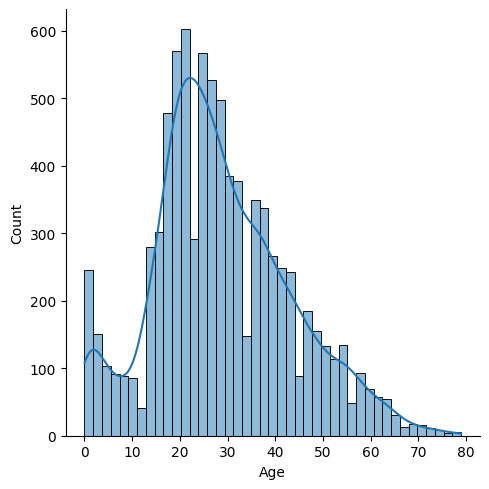

In [30]:
sns.displot(x=train_new['Age'], kde=True)

<pre>thus Age feature is a right skewed Data thus we will fill in null values with its median

In [31]:
train_new['Age'].fillna(train_new['Age'].median(), inplace=True)
train_new['Age'].isnull().sum()

0

In [32]:
train_new['Age'].median()

27.0

27 corresponds to range(21 to 40) which is teenager

In [33]:
train_new['teenager'] =  np.where(train_new['teenager'].isnull(), 1, train_new['teenager'])
train_new['teenager'].isnull().sum()

0

In [34]:
train_new['children'] =  np.where(train_new['children'].isnull(), 0, train_new['children'])
train_new['children'].isnull().sum()

0

In [35]:
train_new['Age_bucket'] = np.where(train_new['Age_bucket'].isnull(), 'teenager', train_new['Age_bucket'])

<h2> <font color=red>VIP 

<pre><b>Logic</b>:  VIP's will get something extra from the Non Vips, In a spaceship i believe it would be the seating i.e 
their Deck or Side.

There are no additional features helping out to fill the null records in VIP (Also VIP is a highly imbalanced data).
Resulting to fill it with mode which would make the data even more imbalance making it overall unuseful.

In [36]:
train_new['VIP'].fillna(train_new['VIP'].mode()[0], inplace=True)
train_new['VIP'].isnull().sum()

0

<h2> <font color=red>'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

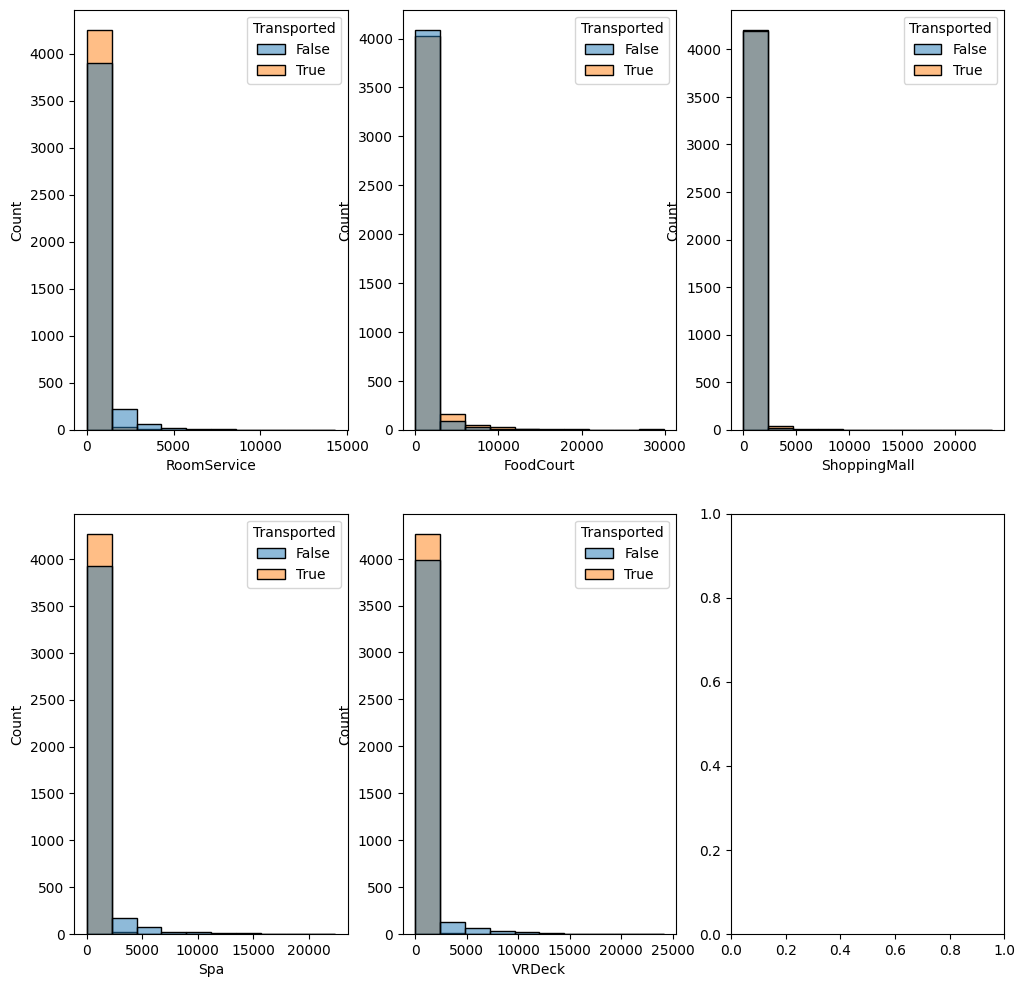

In [37]:
import matplotlib.pyplot as plt

null_filling_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, ax = plt.subplots(2,3,figsize=(12,12))
axes = ax.flatten()
for i,j in zip(null_filling_cols, range(len(null_filling_cols))):
    sns.histplot(data=train_new, x=i, hue=train_new['Transported'],bins=10, ax=axes[j])
plt.show()

<pre>ALL of the density plots of the above plots are Right skewed and dont look to give and any usefull info. except to fill the null values in the engineered binary cols 

In [38]:
for i in null_filling_cols:
    train_new[i].fillna(train_new[i].mean(), inplace=True)

In [39]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        8693 non-null   object 
 1   CryoSleep         8693 non-null   object 
 2   Destination       8693 non-null   object 
 3   Age               8693 non-null   float64
 4   VIP               8693 non-null   bool   
 5   RoomService       8693 non-null   float64
 6   FoodCourt         8693 non-null   float64
 7   ShoppingMall      8693 non-null   float64
 8   Spa               8693 non-null   float64
 9   VRDeck            8693 non-null   float64
 10  Transported       8693 non-null   bool   
 11  Group_number      8693 non-null   int32  
 12  Member_number     8693 non-null   int32  
 13  Deck              8494 non-null   object 
 14  Number            8494 non-null   object 
 15  Side              8494 non-null   float64
 16  Age_bucket        8693 non-null   object 


In [40]:
for i in null_filling_cols:
    train_new[i+'_bin'] = np.where(train_new[i+'_bin'].isnull(),np.where(train_new[i]>0,1,0), train_new[i+'_bin'] )

<h2> <font color=red> Deck

<pre>People having the same group will logically have the same Deck

In [41]:
d1 = train_new[train_new['Deck'].notna()][['Group_number', 'Deck']].set_index('Group_number')['Deck'].to_dict()
train_new.loc[train_new['Deck'].isnull(), 'Deck'] = train_new['Group_number'].map(d1)
train_new['Deck'].isnull().sum()

99

<pre>Filling Rest of the null by mode 

In [42]:
train_new['Deck'].fillna(train_new['Deck'].mode()[0], inplace=True)
train_new['Deck'].isnull().sum()

0

<h2> <font color=red> Number

<pre><b>Logic </b>: Here Number represents seat number so , logically ppl travelling in groups will have one seatnumber ahead 
or back.
Using the logic here I let them have the same seat number as one seat ahead or not wont be a big issue.

In [43]:
train['Number'] = train['Number'].astype(float)

In [44]:
d1 = train_new[train_new['Number'].notna()][['Group_number', 'Number']].set_index('Group_number')['Number'].to_dict()
train_new.loc[train_new['Number'].isnull(), 'Number'] = train_new['Group_number'].map(d1)
train_new['Number'].isnull().sum()

99

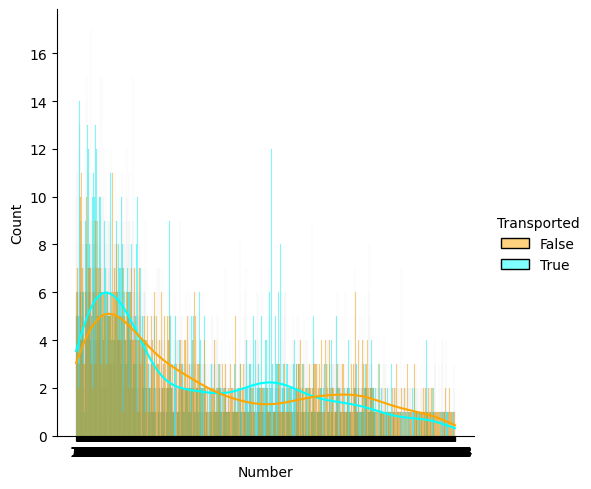

In [45]:
sns.displot(x=train_new['Number'], hue=train_new['Transported'],kde=True, bins=10, palette=['orange','cyan'])

<pre>as the Number col is right skewed we will fill it will median

In [46]:
train_new['Number'].fillna(train_new['Number'].mode()[0], inplace=True)
train_new['Number'].isnull().sum()

0

In [47]:
train_new['Number'] = train_new['Number'].astype(int)

In [48]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        8693 non-null   object 
 1   CryoSleep         8693 non-null   object 
 2   Destination       8693 non-null   object 
 3   Age               8693 non-null   float64
 4   VIP               8693 non-null   bool   
 5   RoomService       8693 non-null   float64
 6   FoodCourt         8693 non-null   float64
 7   ShoppingMall      8693 non-null   float64
 8   Spa               8693 non-null   float64
 9   VRDeck            8693 non-null   float64
 10  Transported       8693 non-null   bool   
 11  Group_number      8693 non-null   int32  
 12  Member_number     8693 non-null   int32  
 13  Deck              8693 non-null   object 
 14  Number            8693 non-null   int32  
 15  Side              8494 non-null   float64
 16  Age_bucket        8693 non-null   object 


<h2> <font color=red> Side

<pre><b>Logic </b>: As Age might be more passengers would go more for a specific Side. OR the VIP's maybe getting a specific Side. But Nothing came to work. After alot of searching i didnt find much help from the data thus will use the median to fill the records

In [49]:
train_new['Side'].fillna(train_new['Side'].mode()[0], inplace=True)
train_new['Side'].isnull().sum()

0

<h3><font color=orange> -------------------------------------------------------------Filled All Null Values ------------------------------------------------------------------------

<pre><br>Using Lot of Logic and Feature engineering and Data Preprocessing and EDA

------------------------------------------------------------------------------------------------------------------

Little more Feature Engineering <br>
Creating New feature using Last Name and Member_number which tells whether a passenger is travelling with family/friends or alone.

In [50]:
from warnings import filterwarnings
filterwarnings('ignore')
train_new['in_group'] = np.zeros(len(train_new))
for index,element in enumerate(np.array(train_new['Member_number'])):
    if element > 1 :
        if element ==2:
            train_new['in_group'][index-1] = 1
        train_new['in_group'][index] = 1
    else:
        train_new['in_group'][index] = 0
        
train_new[['Member_number', 'in_group']]

,Member_number,in_group
0,1,0.0
1,1,0.0
2,1,1.0
3,2,1.0
4,1,0.0
...,...,...
8688,1,0.0
8689,1,0.0
8690,1,0.0
8691,1,1.0


In [51]:
train_new['in_group'].value_counts()

0.0    4805
1.0    3888
Name: in_group, dtype: int64

In [52]:
from warnings import filterwarnings
filterwarnings('ignore')

for index,element in enumerate(np.array(train_new['in_group'])):
    if int(element) > 0 :
        if index != len(train_new)-1:
            if (train_new['Last Name'][index] == train_new['Last Name'][index+1]) | (train_new['Last Name'][index] == train_new['Last Name'][index-1]):
                train_new['in_group'][index]='with family'
            else:
                train_new['in_group'][index]='with friends'
        else:
            if (train_new['Last Name'][index] == train_new['Last Name'][index-1]):
                train_new['in_group'][index]='with family'
            else:
                train_new['in_group'][index]='with friends'
    else:
        train_new['in_group'][index] = 'alone'
        
train_new[['Member_number', 'in_group']]

,Member_number,in_group
0,1,alone
1,1,alone
2,1,with family
3,2,with family
4,1,alone
...,...,...
8688,1,alone
8689,1,alone
8690,1,alone
8691,1,with family


In [53]:
train_new['in_group'].value_counts()

alone           4805
with family     3242
with friends     646
Name: in_group, dtype: int64

<pre>Dropping Last Name feature as the expected goal is achieved

In [54]:
train_new.drop(['Last Name'], axis=1, inplace=True)

<pre>Feature engineering Trip Column from HomePlanet and Destination feature as they have no null values now.

In [55]:
train_new['Trip'] = pd.DataFrame(train_new['HomePlanet']+','+train_new['Destination'])

In [56]:
train_new2= train_new.copy()
train_new2.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Age_bucket,children,teenager,RoomService_bin,FoodCourt_bin,ShoppingMall_bin,Spa_bin,VRDeck_bin,in_group,Trip
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,teenager,0.0,1.0,0.0,0.0,0.0,0.0,0.0,alone,"Europa,TRAPPIST-1e"
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,teenager,0.0,1.0,1.0,1.0,1.0,1.0,1.0,alone,"Earth,TRAPPIST-1e"
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,adult,0.0,0.0,1.0,1.0,0.0,1.0,1.0,with family,"Europa,TRAPPIST-1e"
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,teenager,0.0,1.0,0.0,1.0,1.0,1.0,1.0,with family,"Europa,TRAPPIST-1e"
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,children,1.0,0.0,1.0,1.0,1.0,1.0,1.0,alone,"Earth,TRAPPIST-1e"


<h3><font color=orange>2) Categorical Features to numeric 

### <font color=red>HomePlanet

<Axes: xlabel='HomePlanet', ylabel='count'>

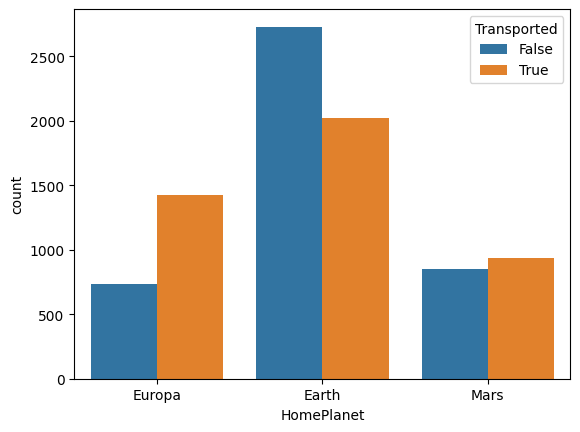

In [57]:
sns.countplot(x=train_new2['HomePlanet'], hue=train_new2['Transported'])

<pre>Observation:<br>
    1)People Travelling from Europa are more likely to be Transported , Passengers from Earth are not and passengers from Mars are equally likely of both.

In [58]:
# train_new2['HomePlanet'] = train_new2['HomePlanet'].map({'Europa': 1,'Earth' :-1,'Mars':1})

In [59]:
encoded_homeplanet = pd.get_dummies(data=train_new2['HomePlanet'], drop_first=False)
encoded_homeplanet

,Earth,Europa,Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
8688,0,1,0
8689,1,0,0
8690,1,0,0
8691,0,1,0


In [60]:
train_new2['Earth'] = encoded_homeplanet.iloc[:,0]
train_new2['Europa'] = encoded_homeplanet.iloc[:,1]
train_new2['Mars'] = encoded_homeplanet.iloc[:,2]
train_new2.drop(['HomePlanet'], axis=1, inplace=True)

### <font color=red>CryoSleep

<Axes: xlabel='CryoSleep', ylabel='count'>

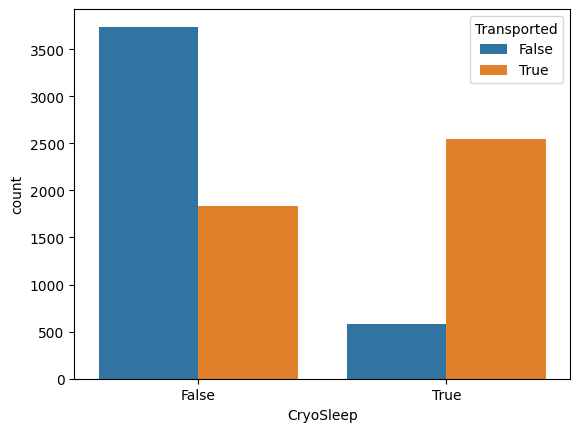

In [61]:
sns.countplot(x=train_new2['CryoSleep'], hue=train_new2['Transported'])

<pre>Observation :
    1)CryoSleep has a positive relation when True and neg relation when False

In [62]:
train_new2['CryoSleep'] = train_new2['CryoSleep'].map({True:1 , False:0})

### <font color=red>Destination

<Axes: xlabel='Destination', ylabel='count'>

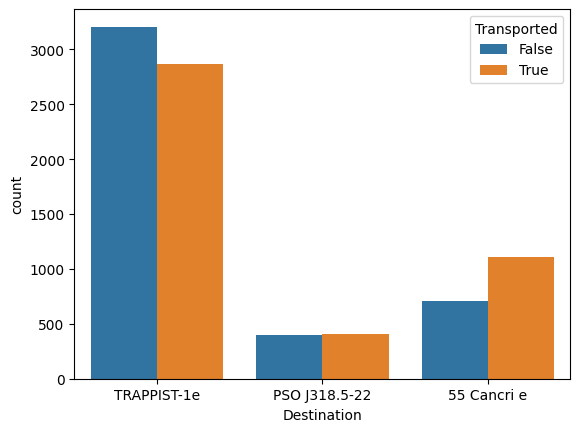

In [63]:
sns.countplot(x=train_new2['Destination'], hue=train_new2['Transported'])

<pre>Observation:<br>
1)People Travelling to '55 Cancri e' are more likely to be Transport , Passengers from 'Trappist-1e' are not and passengers from 'PSO J318.5-22' are qually likely of both.


In [64]:
encoded_destination = pd.get_dummies(data=train_new2['Destination'])
encoded_destination

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8688,1,0,0
8689,0,1,0
8690,0,0,1
8691,1,0,0


In [65]:
train_new2['55 Cancri e'] = encoded_destination.iloc[:,0]
train_new2['PSO J318.5-22'] = encoded_destination.iloc[:,1]
train_new2['TRAPPIST-1e'] = encoded_destination.iloc[:,2]
train_new2.drop(['Destination'], axis=1, inplace=True)

In [66]:
# train_new2['Destination'] = train_new2['Destination'].map({'PSO J318.5-22': 0,'55 Cancri e': 1,'TRAPPIST-1e': -1})

### <font color=red>VIP

<Axes: xlabel='VIP', ylabel='count'>

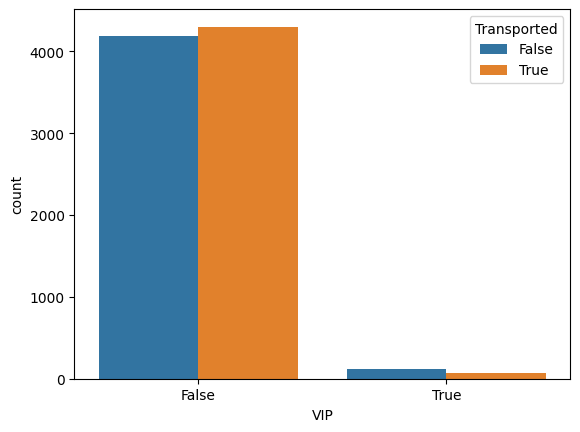

In [67]:
sns.countplot(x=train_new2['VIP'], hue=train_new2['Transported'])

<pre>Observation :
    1)VIP feature is highly imbalanced so we will consider dropping the Column

In [68]:
train_new2['VIP'] = train_new2['VIP'].map({True:1 , False:0})

In [69]:
train_new2.drop(columns=['VIP'], inplace=True)

### <font color=red>Transported

In [70]:
train_new2['Transported'] = train_new2['Transported'].map({True:1,False:0})

### <font color=red>Deck

<Axes: xlabel='Deck', ylabel='count'>

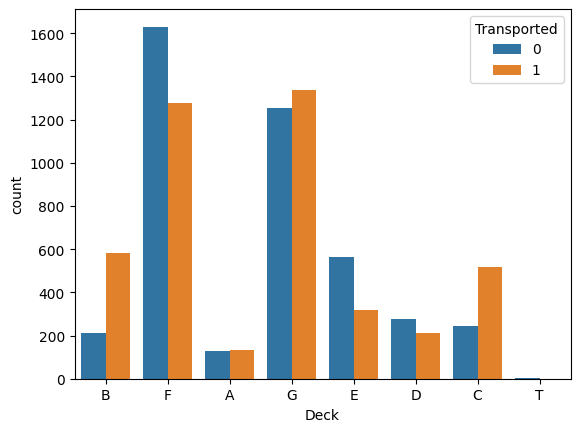

In [71]:
sns.countplot(x=train_new2['Deck'], hue=train_new2['Transported'])

Observation : <br>
    1)Decks E & F have a negative corr. with the Transported column.<br>
    2)Decks B & C have a positive corr. with the Transported column.<br>
    3)Decks A, G & D have almost equal corr. with the Target and Deck T as such does not really have any records so we will group them in the equal corr. grp.<br>
    
Since Mapping each deck seperate gives better results we will go for it

In [72]:
train_new2['Deck'] = train_new2['Deck'].map({'A':0,'B':1,'C':1,'D':0,'E':-1,'F':-1,'G':0, 'T':0})

### <font color=red>Age bucket

<Axes: xlabel='Age_bucket', ylabel='count'>

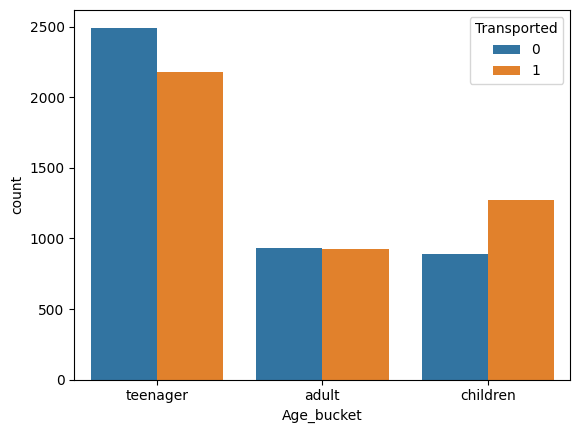

In [73]:
sns.countplot(x=train_new2['Age_bucket'], hue=train_new2['Transported'])

In [74]:
train_new2['Age_bucket'] = train_new2['Age_bucket'].map({'teenager':-1,'children':1,'adult':0})

### <font color=red>Trip

<Axes: xlabel='Trip', ylabel='count'>

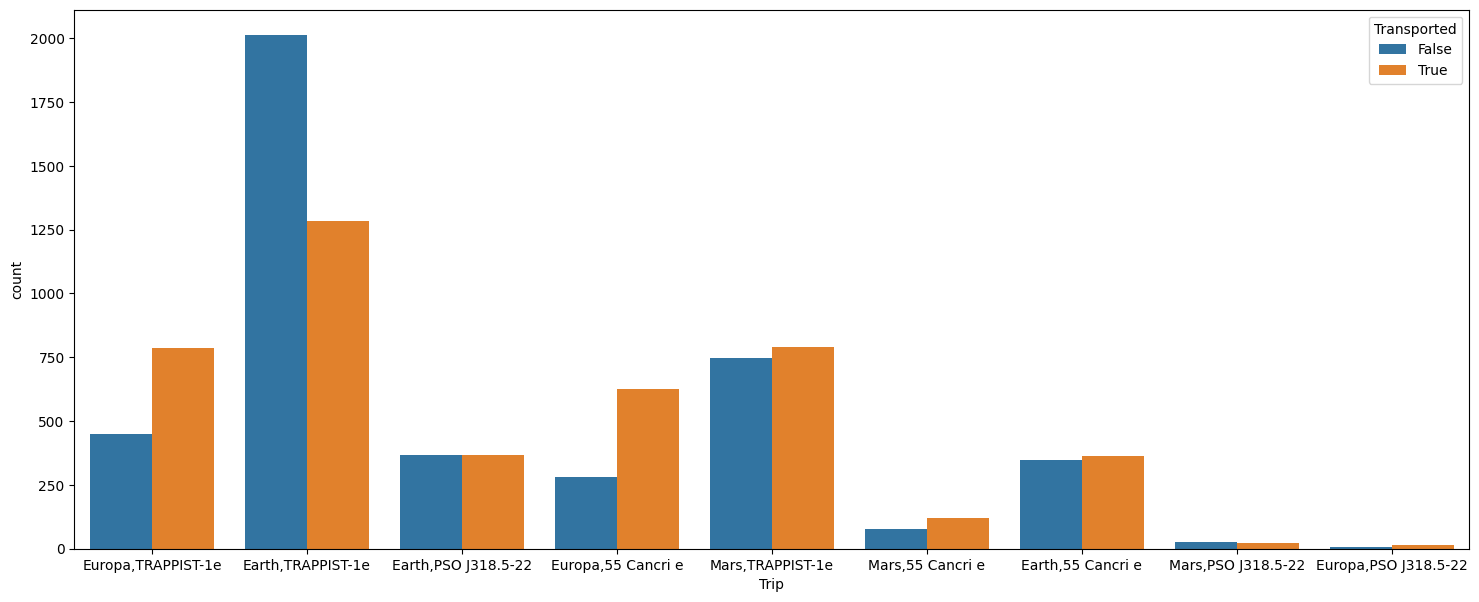

In [75]:
plt.figure(figsize=(18,7))
sns.countplot(x=train_new['Trip'], hue=train_new['Transported'])

<pre>Observation :
    Europa,TRAPPIST-1e,Europa,55 Cancri e,Mars,55 Cancri e,Europa,PSO J318.5-22 have pos corr with target
    Earth,TRAPPIST-1e,Mars,PSO J318.5-22 have neg corr with target    

In [76]:
train_new2['Trip'].unique()

array(['Europa,TRAPPIST-1e', 'Earth,TRAPPIST-1e', 'Earth,PSO J318.5-22',
       'Europa,55 Cancri e', 'Mars,TRAPPIST-1e', 'Mars,55 Cancri e',
       'Earth,55 Cancri e', 'Mars,PSO J318.5-22', 'Europa,PSO J318.5-22'],
      dtype=object)

In [77]:
train_new2['Trip'] = train_new2['Trip'].map({'Europa,TRAPPIST-1e':1, 'Earth,TRAPPIST-1e':-1,
                                                         'Earth,PSO J318.5-22':0,'Europa,55 Cancri e':1,
                                                         'Mars,TRAPPIST-1e':0, 'Mars,55 Cancri e':1,
                                                         'Earth,55 Cancri e':0,'Mars,PSO J318.5-22':-1,
                                                         'Europa,PSO J318.5-22': 1})

<Axes: xlabel='Trip', ylabel='count'>

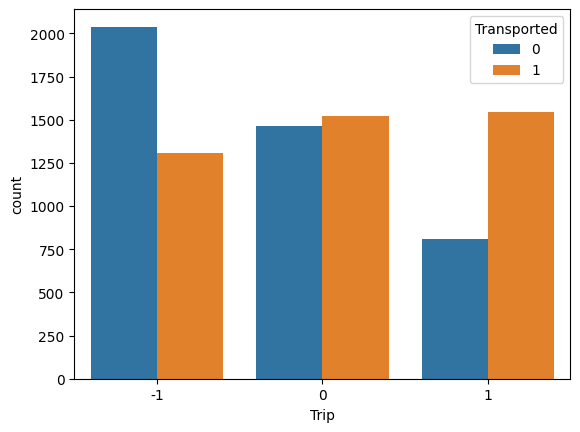

In [78]:
sns.countplot(x=train_new2['Trip'], hue=train_new2['Transported'])

In [79]:
train_new2.drop(['Trip'], axis=1, inplace=True)

<pre> As model performs better without this column we will drop it

### <font color=red>in_group

<Axes: xlabel='in_group', ylabel='count'>

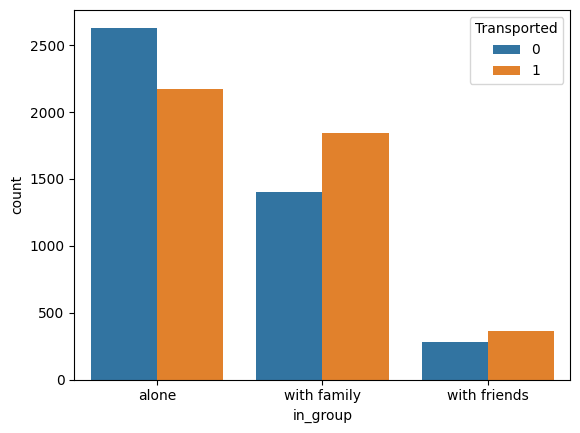

In [80]:
sns.countplot(data=train_new2, x='in_group', hue='Transported')

<pre>Observation:
    1) The graph says passenger who were travelling with friends were more prone to be transported.

In [81]:
train_new2['in_group'] = train_new2['in_group'].map({'alone' : -1, 'with family':1, 'with friends':1})
train_new2.drop(['in_group'], axis=1, inplace=True)

<pre>Again dropping this benefits model

<h4>-----------------------------------------------Encoded data-----------------------------------------------------------

In [82]:
train_new2

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group_number,Member_number,...,FoodCourt_bin,ShoppingMall_bin,Spa_bin,VRDeck_bin,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0,1,0,0,0,1
1,0,24.0,109.0,9.0,25.0,549.0,44.0,1,2,1,...,1.0,1.0,1.0,1.0,1,0,0,0,0,1
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,3,1,...,1.0,0.0,1.0,1.0,0,1,0,0,0,1
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,3,2,...,1.0,1.0,1.0,1.0,0,1,0,0,0,1
4,0,16.0,303.0,70.0,151.0,565.0,2.0,1,4,1,...,1.0,1.0,1.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0,9276,1,...,1.0,0.0,1.0,1.0,0,1,0,1,0,0
8689,1,18.0,0.0,0.0,0.0,0.0,0.0,0,9278,1,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
8690,0,26.0,0.0,0.0,1872.0,1.0,0.0,1,9279,1,...,0.0,1.0,1.0,0.0,1,0,0,0,0,1
8691,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0,9280,1,...,1.0,0.0,1.0,1.0,0,1,0,1,0,0


<h3><font color=orange>1)Data Cleaning</font></h3>
<pre> -Dropping unwanted columns or columns which capture the same information

### <font color=red>Age

<pre>There are four columns derived from the Age columns so we will have to keep any one of them which is most corr. with the Target among them.

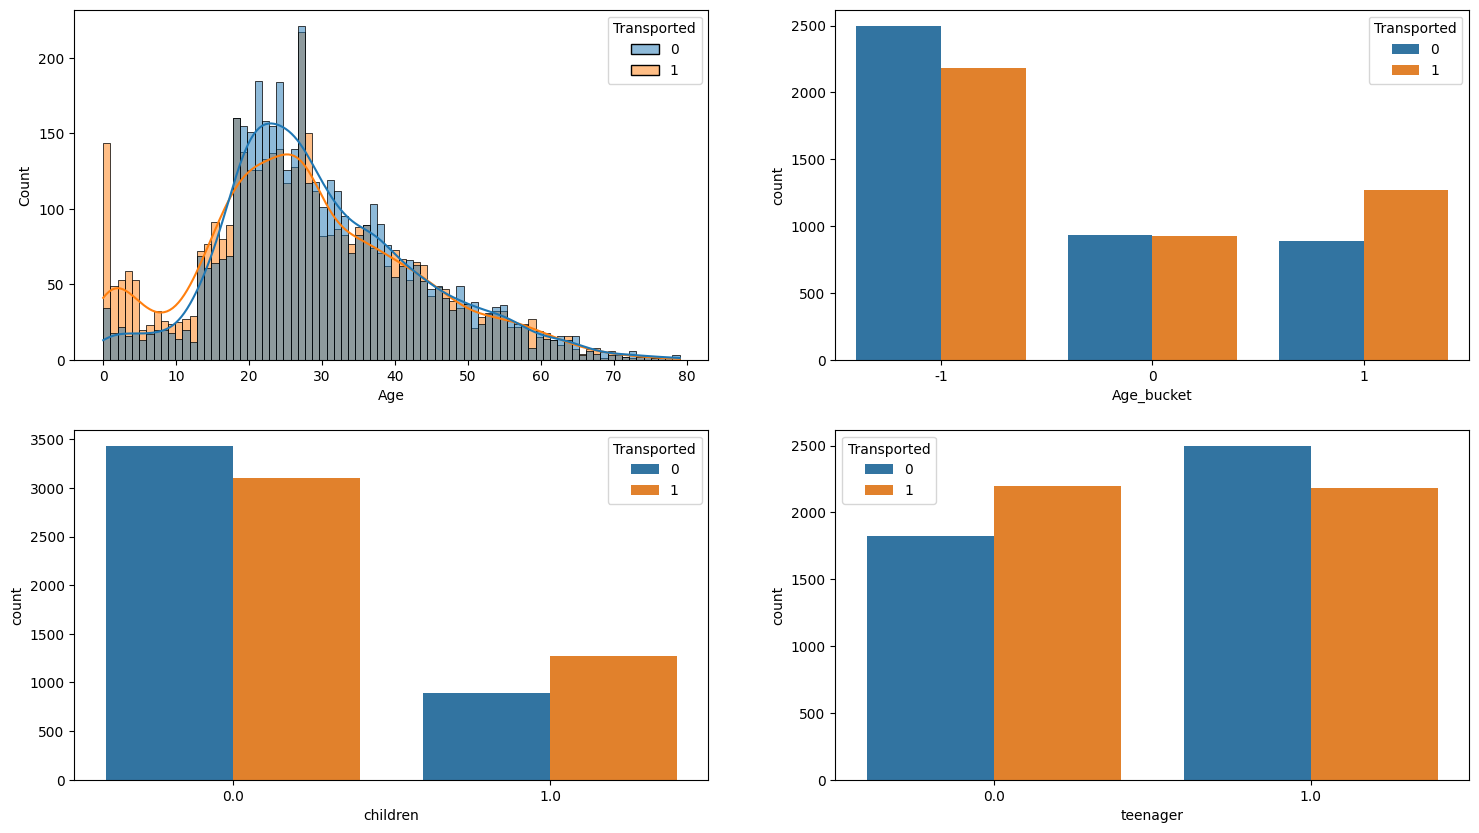

In [83]:
age_rel_cols = ['Age','Age_bucket', 'children', 'teenager']
fig, ax = plt.subplots(2, 2, figsize=(18,10))
axes = ax.flatten()
for index, col in enumerate(age_rel_cols):
    if index !=0:
        sns.countplot(x=train_new2[col], hue=train_new2['Transported'], ax=axes[index])
    else:
        sns.histplot(x=train_new2[col], hue=train_new2['Transported'], ax=axes[index], kde=True, bins=80)

In [84]:
train_new2[age_rel_cols+['Transported']].corr()

,Age,Age_bucket,children,teenager,Transported
Age,1.000000,-0.314538,-0.669118,-0.051091,-0.074233
Age_bucket,-0.314538,1.000000,0.884367,-0.914552,0.098050
children,-0.669118,0.884367,1.000000,-0.619997,0.098093
teenager,-0.051091,-0.914552,-0.619997,1.000000,-0.079810
Transported,-0.074233,0.098050,0.098093,-0.079810,1.000000


<pre><b>Conclusion : </b><br>
    We can <b>keep the Age  column</b> as it is different from others and gives better results when added to model.

In [85]:
train_new2.drop(['Age_bucket', 'children', 'teenager'], axis=1, inplace=True)

### <font color=red>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

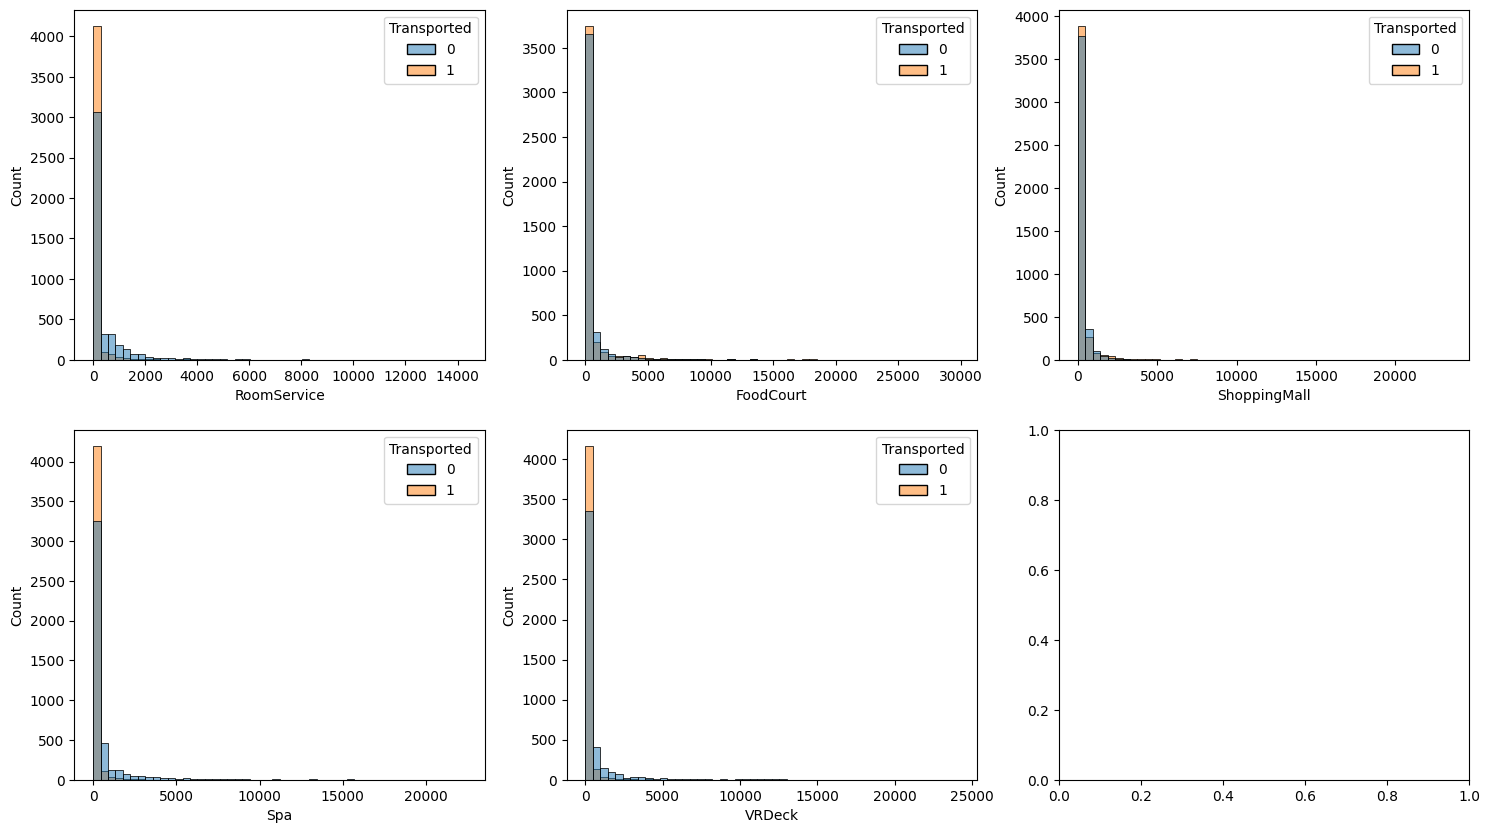

In [86]:
#cols list was created while creating binary features of the plotted cols

fig, ax = plt.subplots(2,3,figsize=(18,10))
axes = ax.flatten()
for index, col in enumerate(cols):
    sns.histplot(x=train_new2[col], hue=train_new2['Transported'],ax=axes[index], bins=50)

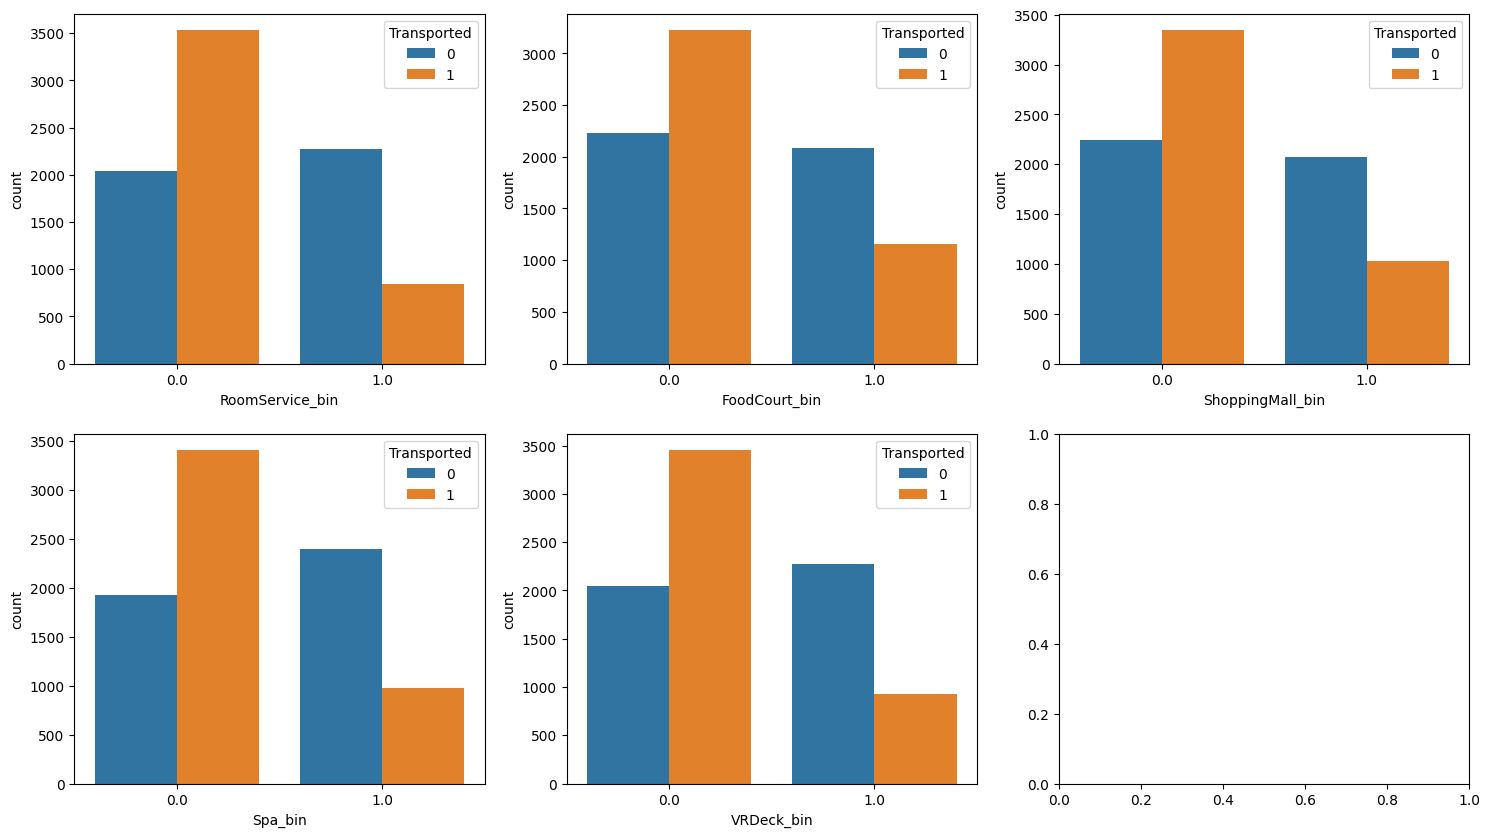

In [87]:
fig, ax = plt.subplots(2,3,figsize=(18,10))
axes = ax.flatten()
for index, col in enumerate(cols):
    sns.countplot(x=train_new2[col+'_bin'], hue=train_new2['Transported'],ax=axes[index])

<pre>Observation:
    The visualizaitons tell us the binary columns are more powerfull for predicting Transported . Also it logically supports my theory as The ppl who spend are often busier in enjoying the luxury and dont get to escape while the spaceship was meeting the dust hole.
    

In [88]:
train_new2.drop(columns=['RoomService_bin', 'FoodCourt_bin', 'ShoppingMall_bin', 'Spa_bin', 'VRDeck_bin'], inplace=True)

#### -----------------------------------------------------------------------------------------Numeric Data ---------------------------------------------------------------------------------

In [89]:
train_new2

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group_number,Member_number,Deck,Number,Side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,0.0,0,1,0,0,0,1
1,0,24.0,109.0,9.0,25.0,549.0,44.0,1,2,1,-1,0,1.0,1,0,0,0,0,1
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,3,1,0,0,1.0,0,1,0,0,0,1
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,3,2,0,0,1.0,0,1,0,0,0,1
4,0,16.0,303.0,70.0,151.0,565.0,2.0,1,4,1,-1,1,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0,9276,1,0,98,0.0,0,1,0,1,0,0
8689,1,18.0,0.0,0.0,0.0,0.0,0.0,0,9278,1,0,1499,1.0,1,0,0,0,1,0
8690,0,26.0,0.0,0.0,1872.0,1.0,0.0,1,9279,1,0,1500,1.0,1,0,0,0,0,1
8691,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0,9280,1,-1,608,1.0,0,1,0,1,0,0


<h3><font color=orange>4)Outlier handling</font></h3>    
<pre> Used Outlier handling but did not work (gave bad results)

In [90]:
continous_cols = []
for i in train_new2.columns:
    if len(train_new2[i].unique()) > 10:
        continous_cols.append(i)

In [91]:
import matplotlib.pyplot as plt
import numpy as np

def Outlier_counter(outlier, data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])
    globals() [outlier] = outliers

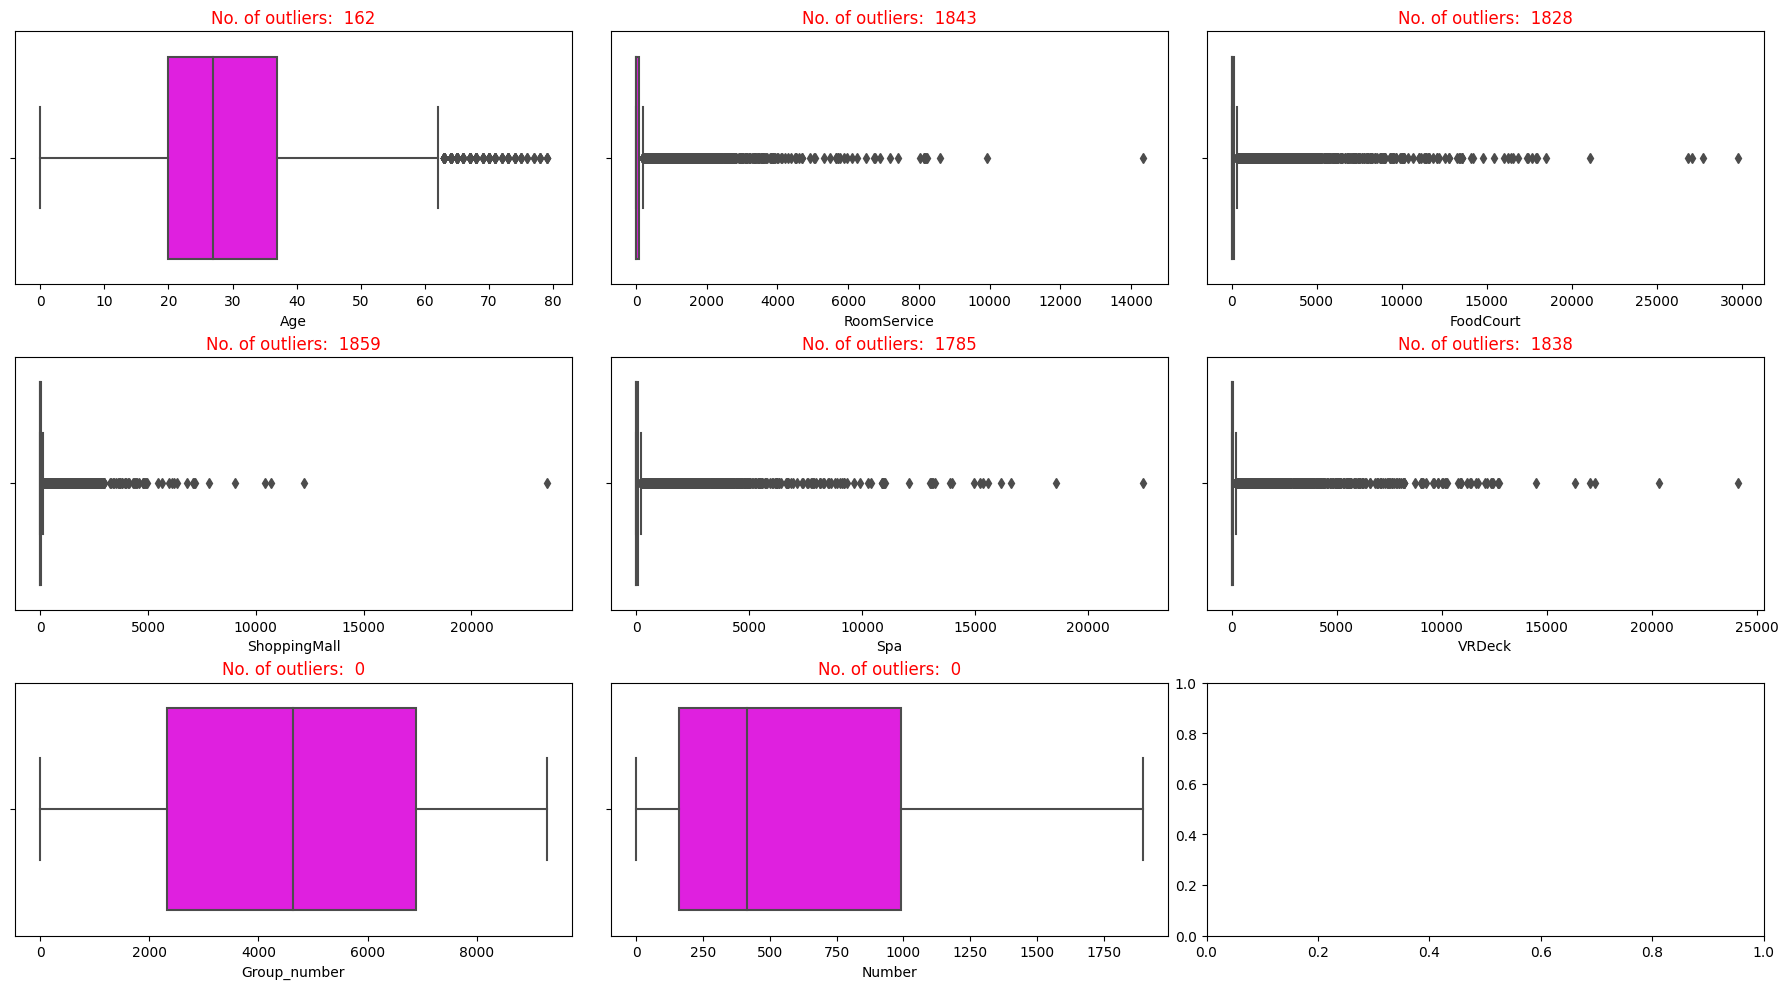

In [92]:
fig, ax = plt.subplots(ncols=3, nrows=(len(continous_cols)+1)//3, figsize=(18,10))
axes = ax.flatten()
try:
    for i in range(len(continous_cols)):  # Go through all the continuous columns
        sns.boxplot(x=train_new2[continous_cols[i]], ax=axes[i], hue=train_new2['Transported'], palette=['magenta', 'cyan'])
        Outlier_counter('outlier', train_new2, continous_cols[i])
        title = f'No. of outliers:  {outlier}'
        axes[i].set_title(title, color='r')
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.tight_layout(h_pad=0.5, w_pad=0.5)
    plt.show()
except IndexError:
    pass

<h4><center>---------------------------------------------------------------------------------Final Data---------------------------------------------------------------------------------

In [93]:
final_data = train_new2.copy()
final_data

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group_number,Member_number,Deck,Number,Side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,0.0,0,1,0,0,0,1
1,0,24.0,109.0,9.0,25.0,549.0,44.0,1,2,1,-1,0,1.0,1,0,0,0,0,1
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,3,1,0,0,1.0,0,1,0,0,0,1
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,3,2,0,0,1.0,0,1,0,0,0,1
4,0,16.0,303.0,70.0,151.0,565.0,2.0,1,4,1,-1,1,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0,9276,1,0,98,0.0,0,1,0,1,0,0
8689,1,18.0,0.0,0.0,0.0,0.0,0.0,0,9278,1,0,1499,1.0,1,0,0,0,1,0
8690,0,26.0,0.0,0.0,1872.0,1.0,0.0,1,9279,1,0,1500,1.0,1,0,0,0,0,1
8691,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0,9280,1,-1,608,1.0,0,1,0,1,0,0


## <font color=arial><center> EDA

### <font color=red>Histplot

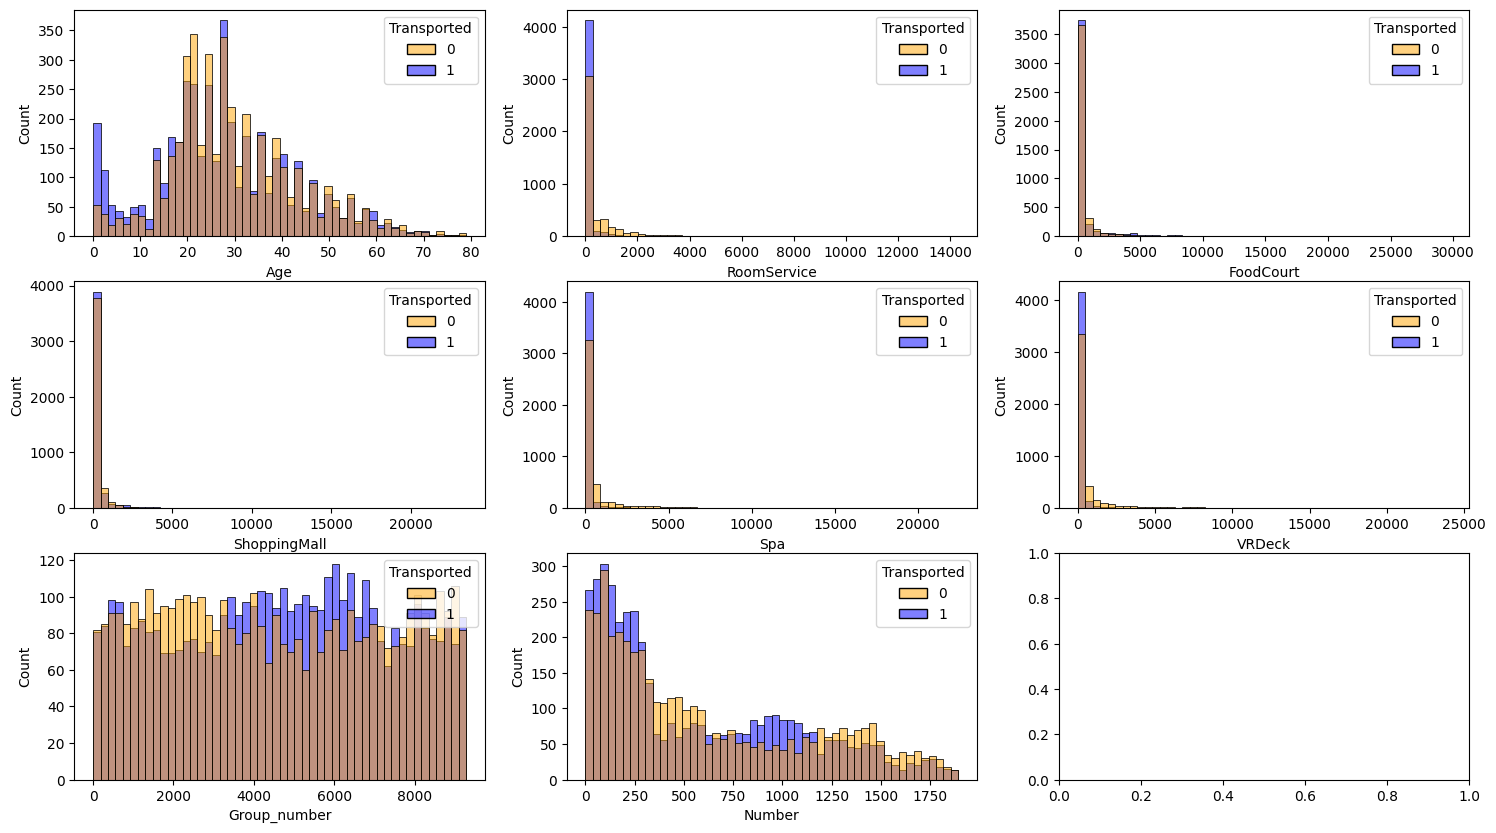

In [94]:
fig, ax = plt.subplots(ncols=3, nrows=(len(continous_cols)+1)//3, figsize=(18,10))
axes = ax.flatten()

for i in range(len(continous_cols)):
    sns.histplot(x=final_data[continous_cols[i]], hue=final_data['Transported'], ax=axes[i], bins=50, palette=['orange', 'blue'])
plt.show()

<pre><b>Observation:
       1)Age - All the youth mostly have been transported as they are more fit and active they could escape the meeting of dust hole.
       2)Amount spent - All features where the spenditure is being shown indicated people spending on amenities are more  prone to not be transported as they be busy in enjoying those and not getting enough of time to reach out for help.
       3)Group Number - Specifically Tells us The Group Number from around 4k to 7k were having sense of what is
happening in the Spaceship as well as they had time to react
       5)Number -  similar to group number The Number feature also tells us certain specific ranges of Seat Number were having more time and knowledge about the activity , while others where not.

### <font color=red>Countplot

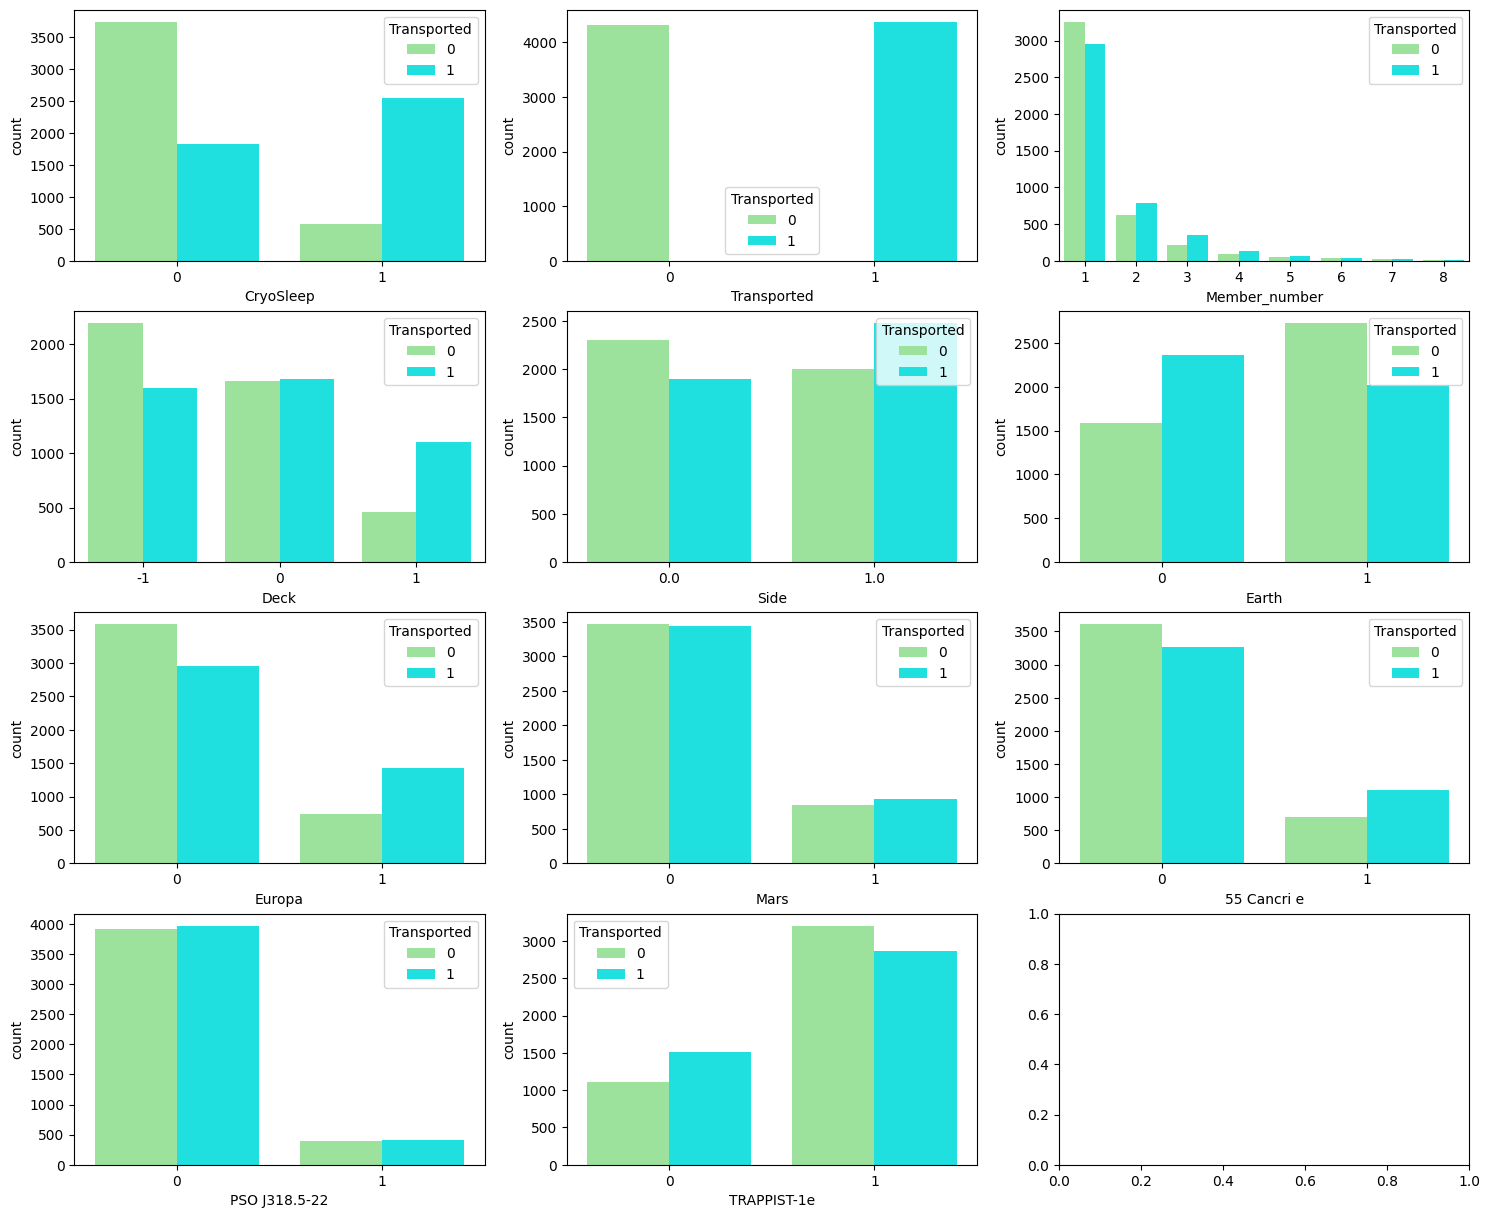

In [95]:
discrete_cols = list()
for col in final_data.columns:
    if col not in continous_cols:
        discrete_cols.append(col)
        
        
fig, ax = plt.subplots(ncols=3, nrows=(len(discrete_cols)+2)//3, figsize=(18,15))
axes = ax.flatten()

for i in range(len(discrete_cols)):
    sns.countplot(x=final_data[discrete_cols[i]], hue=final_data['Transported'], ax=axes[i], palette=['lightgreen', 'cyan'])
plt.show()        

<pre><b>Observation:
    1)We can analyze most of the columns tend to make some positive or negative corr. with its discrete values but the 'PSO J318.5-22','Mars' doesnt do the same making it unvaluable in helping the model.Thus we will consider dropping it.
    
These plots tend to better the results of the model as per the visuals which in fact does not, and the continous columns with non classifying distributions tend to support the model more to get better accuracy. Maybe its because of the 
originality of the data.

### <font color=red>Heatmap

<pre>Dropping Columns causing Multi-collinearity and columns where corr. < 0.01 with target

<Axes: >

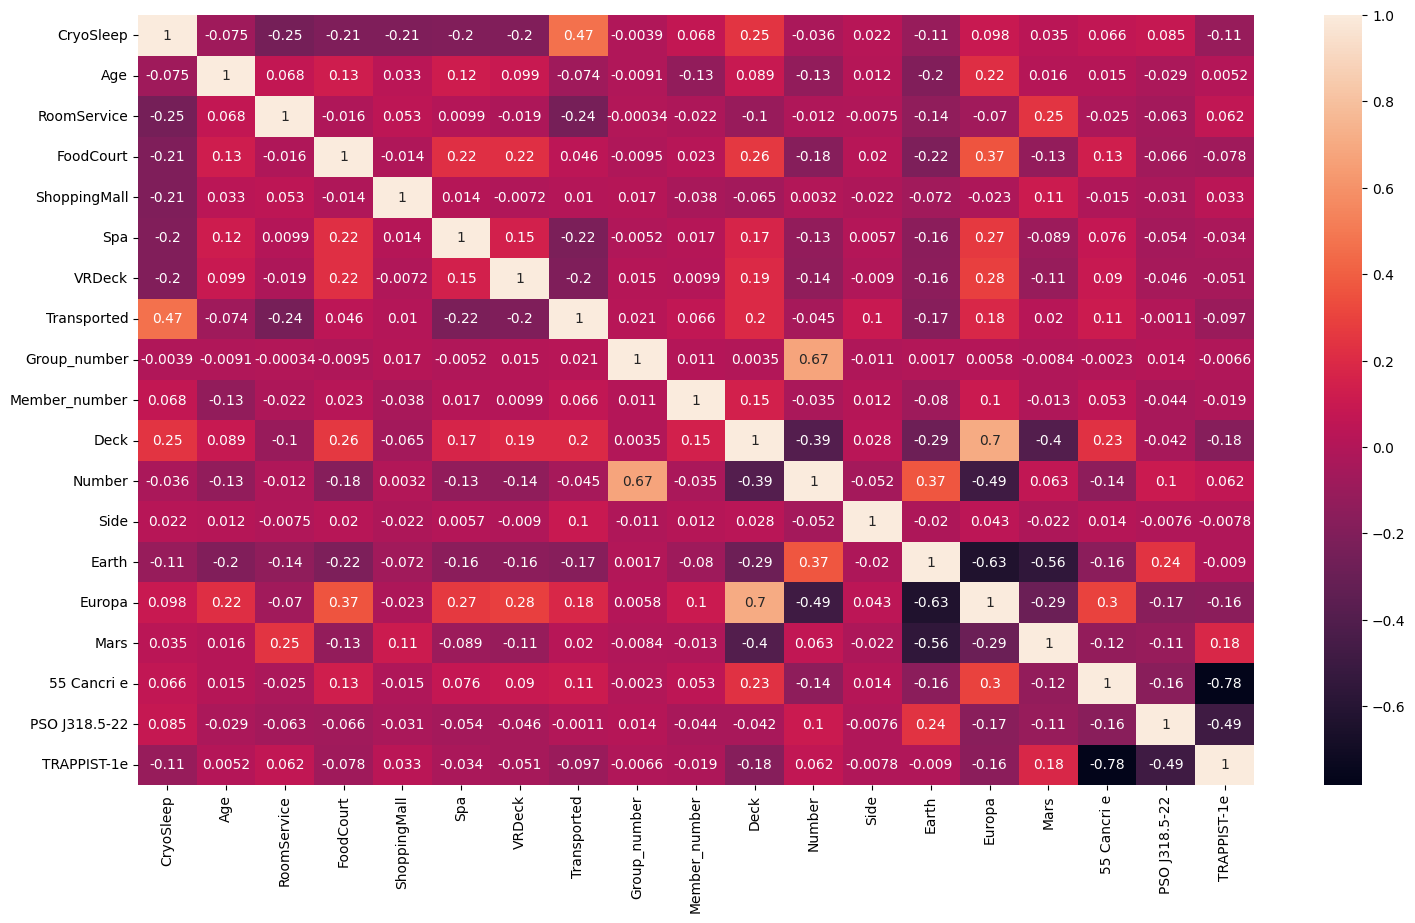

In [96]:
plt.figure(figsize=(18,10))
sns.heatmap(final_data.corr(), annot=True)

<pre>Observation:
    1)Europa are Highly corr. with Earth  as well as Deck thus Dropping Europa. 
    2)whereas Group_number shares where less corr. with the target
    3)TRAPPIST-1e and 55 Cancri e have high collinearity , since 55 Cancri e has a higher collinearity compared to the
    other with the target we will drop TRAPPIST-1e

<Axes: >

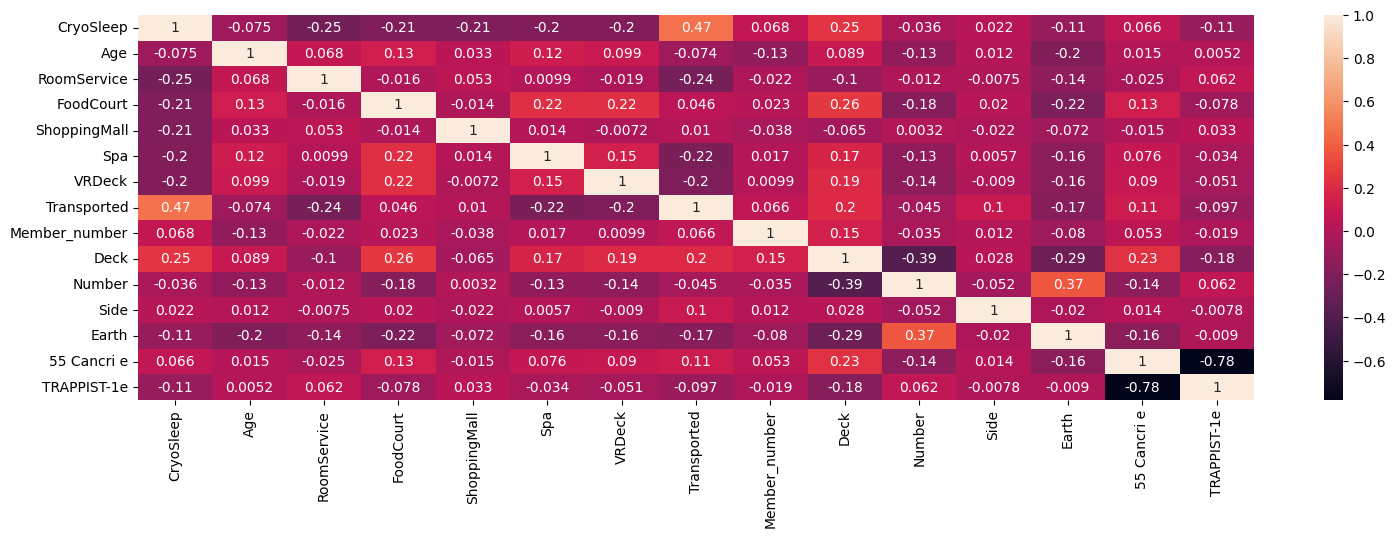

In [97]:
final_data.drop(columns=[ 'Group_number', 'PSO J318.5-22', 'Mars', 'Europa'], axis=1, inplace=True)
plt.figure(figsize=(18,5))
sns.heatmap(final_data.corr(), annot=True)

<pre>Used only cols where corr. with target > 0.05/0.1/0.2 but didnt work.

In [98]:
class_rel_cols=[]
for j,k in zip(final_data.corr()['Transported'],final_data.columns):
    if j > 0.05 or j <-0.05:
        print(k, j)
        class_rel_cols.append(k)

CryoSleep 0.4668888099774859
Age -0.07423258632964812
RoomService -0.24204764964790917
Spa -0.21879096278820892
VRDeck -0.20482507872054614
Transported 1.0
Member_number 0.06638987000291664
Deck 0.1954619429693901
Side 0.10139736578441837
Earth -0.17222140561598098
55 Cancri e 0.11029181703815237
TRAPPIST-1e -0.09700038487417373


### <font color=red>Pairplot

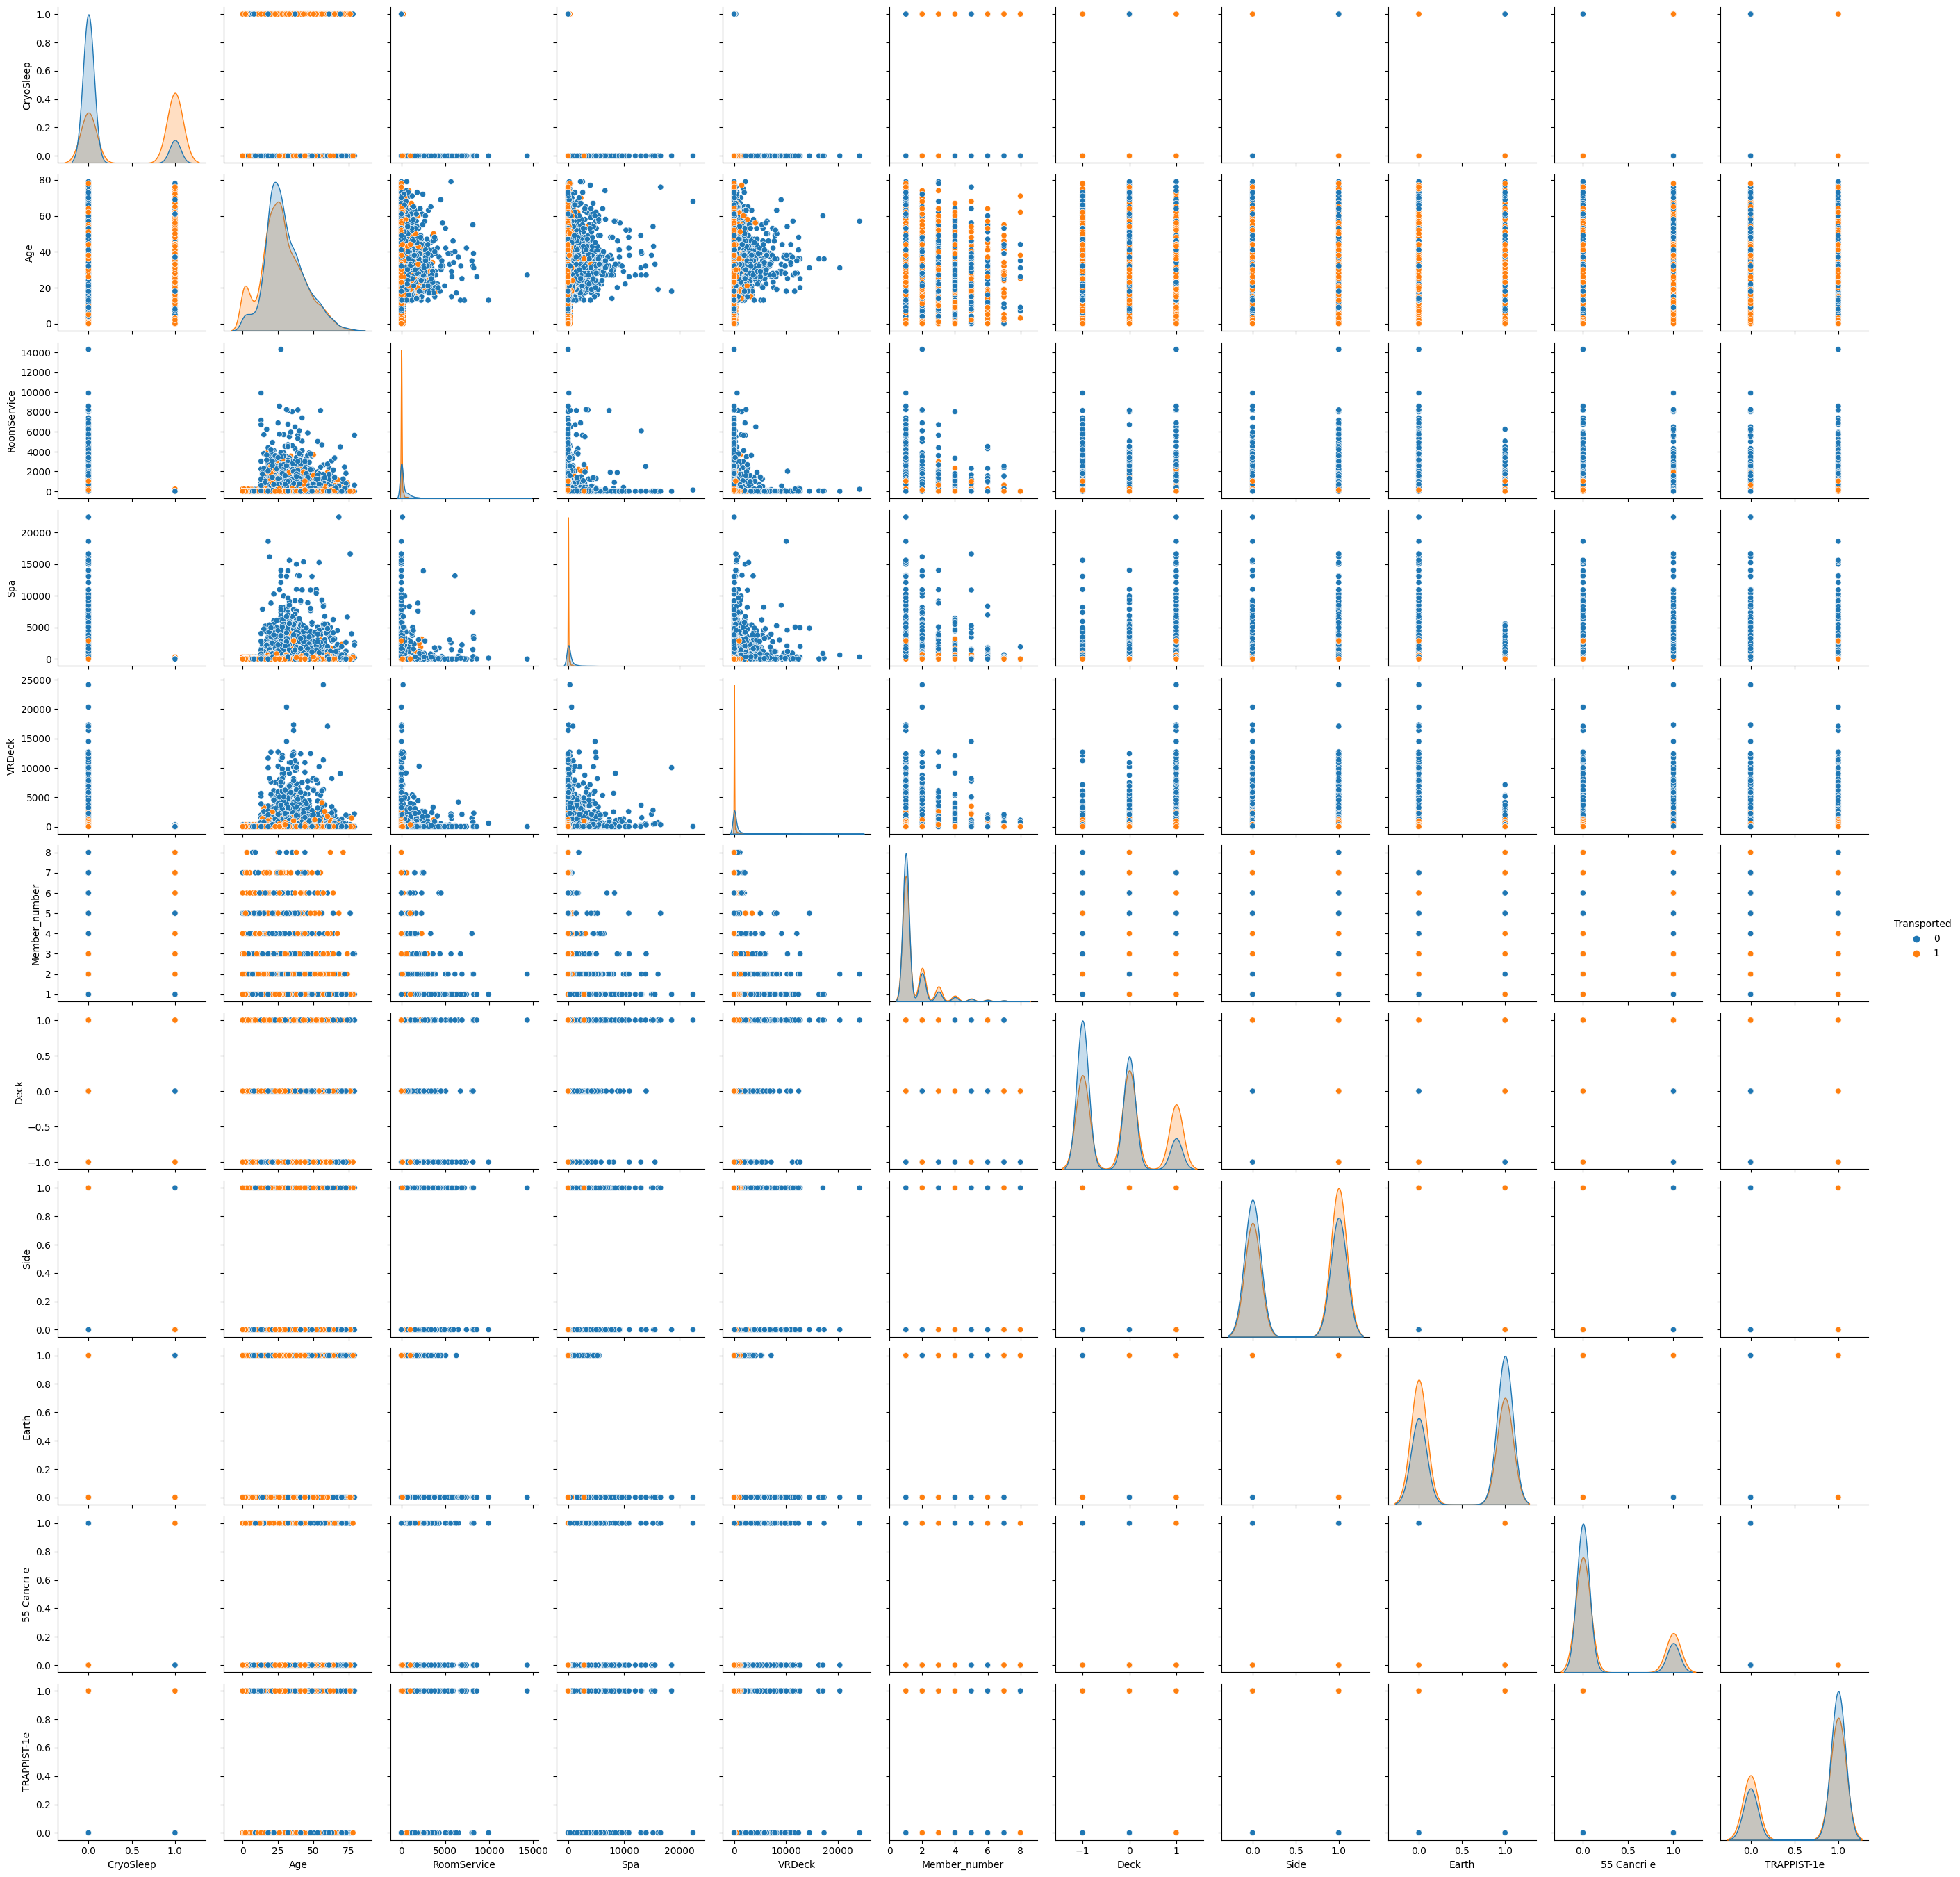

In [99]:
sns.pairplot(data=train_new2[class_rel_cols], hue='Transported')

<pre>Tried keeping Class related columns but didn't work

<pre><h1><font color=arial><center>
   1)Train Test Split
 2)Model Building
 3)Model Training
   4)Model Evaluation

In [100]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      8693 non-null   int64  
 1   Age            8693 non-null   float64
 2   RoomService    8693 non-null   float64
 3   FoodCourt      8693 non-null   float64
 4   ShoppingMall   8693 non-null   float64
 5   Spa            8693 non-null   float64
 6   VRDeck         8693 non-null   float64
 7   Transported    8693 non-null   int64  
 8   Member_number  8693 non-null   int32  
 9   Deck           8693 non-null   int64  
 10  Number         8693 non-null   int32  
 11  Side           8693 non-null   float64
 12  Earth          8693 non-null   uint8  
 13  55 Cancri e    8693 non-null   uint8  
 14  TRAPPIST-1e    8693 non-null   uint8  
dtypes: float64(7), int32(2), int64(3), uint8(3)
memory usage: 772.6 KB


In [101]:
X = final_data.drop(['Transported'], axis=1).values
y = final_data['Transported'].values

In [102]:
from sklearn.model_selection import train_test_split, KFold
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from colorama import Fore
import joblib
from sklearn.metrics import log_loss, accuracy_score,confusion_matrix,precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

scaler = StandardScaler()

gb = GradientBoostingClassifier()
rforest = RandomForestClassifier() 
l_reg = LogisticRegression()
svc = SVC(probability=True)
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#TESTED ALL POSSIBLE MODELS AND KEPT THE BEST TWO 
vt_clf = VotingClassifier(estimators=[('GB_clf', gb),
                                     ('Rf_clf', rforest)], voting='soft')
st_clf = StackingClassifier(estimators=[('GB_clf', gb),
                                       ('Rf_clf', rforest)],final_estimator=l_reg)
vt_st_clf = VotingClassifier([('Voting clf', vt_clf), ('Stacking clf',st_clf)], voting='soft')


models = [st_clf, vt_clf, vt_st_clf]
model_names = [ 'StackingClf', 'VotingClf' , 'Vt_St_clf']
best_indices_dict = {}

for i, model in enumerate(models):
    model_name = model_names[i]
    best_accuracy = 0.0
    print('---------------------------',model_name,'------------------------------')
    mean_val_acc, mean_test_acc = [], []

    for train_indices, test_indices in kfold.split(X):            
            X_train, X_val, y_train, y_val = train_test_split(X[train_indices], y[train_indices], test_size=0.2, random_state=42)
            X_train = scaler.fit_transform(X_train)
            X_val = scaler.fit_transform(X_val)
            model.fit(X_train, y_train)

            y_val_pred = model.predict(X_val)
            
            val_accuracy = accuracy_score(y_val, y_val_pred)
            mean_val_acc.append(val_accuracy)
    
            # Perform testing on the test set for this fold
            X_test, y_test = X[test_indices], y[test_indices]
            X_test = scaler.fit_transform(X_test)
                        
            y_test_pred = model.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            mean_test_acc.append(test_accuracy)

            if val_accuracy > test_accuracy:
                print(f'{Fore.GREEN}Validation accuracy : :', round(val_accuracy, 4), end=f"{Fore.RESET}\t")
                print(f'{Fore.RED}Test accuracy : :', round(test_accuracy, 4), f"{Fore.RESET}")
            else:            
                print(f'{Fore.RED}Validation accuracy : :', round(val_accuracy, 4), end=f"{Fore.RESET}\t")
                print(f'{Fore.GREEN}Test accuracy : :', round(test_accuracy, 4), f"{Fore.RESET}")

            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_indices_dict[model_name]={
                    'train': train_indices,
                    'test': test_indices
                }
    print('Mean Val accuracy : ', np.mean(mean_val_acc), 'Mean Test accuracy : ',np.mean(mean_test_acc))

--------------------------- StackingClf ------------------------------
Validation accuracy : : 0.8138	Test accuracy : : 0.8016 
Validation accuracy : : 0.7922	Test accuracy : : 0.7941 
Validation accuracy : : 0.8102	Test accuracy : : 0.8079 
Validation accuracy : : 0.7872	Test accuracy : : 0.8078 
Validation accuracy : : 0.7965	Test accuracy : : 0.8113 
Mean Val accuracy :  0.8 Mean Test accuracy :  0.8045565385182945
--------------------------- VotingClf ------------------------------
Validation accuracy : : 0.8088	Test accuracy : : 0.7918 
Validation accuracy : : 0.7843	Test accuracy : : 0.7947 
Validation accuracy : : 0.8109	Test accuracy : : 0.8125 
Validation accuracy : : 0.7901	Test accuracy : : 0.8078 
Validation accuracy : : 0.8023	Test accuracy : : 0.8124 
Mean Val accuracy :  0.7992810927390366 Mean Test accuracy :  0.8038666191103573
--------------------------- Vt_St_clf ------------------------------
Validation accuracy : : 0.8174	Test accuracy : : 0.7964 
Validation accura

<pre><h3><font color=blue><center> We will use the Voting Classifier model as its val accuracy and test accuracy is better
than others.

---------------------------------------------------------------------------------------------------------------------------------

<h1><font color=arial><center> Pipeline

<h1><font color=arial><center>Creating Preprocessing Functions

In [103]:
import pandas as pd
import numpy as np

def feature_engineering(data_1, column1='PassengerId', column2='Cabin', column3='Name'):
    data_1[['Group_number', 'Member_number']] = data_1[column1].str.split('_', n=1, expand=True)
    data_1['Group_number'] = data_1['Group_number'].astype(int)
    data_1['Member_number'] = data_1['Member_number'].astype(int)
    data_1[['Deck', 'Number', 'Side']] = data_1[column2].str.split('/', n=2, expand=True)
    transformed_data = data_1.copy()
    return transformed_data

def binary_creator_and_null_filler(data, cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']): 
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        data[col+'_bin'] = np.where(data[col].isnull(), np.nan, np.where(data[col]>0,1,0))
        transformed_data = data.copy()
    return transformed_data

def null_filler(data, cols_list=['HomePlanet', 'Destination', 'Deck', 'Number'], col1='CryoSleep',bin_cols=['RoomService_bin', 'FoodCourt_bin', 'ShoppingMall_bin', 'Spa_bin', 'VRDeck_bin']):
    for col in cols_list:
        d1 = data[data[col].notna()][['Group_number', col]].set_index('Group_number')[col].to_dict()
        data.loc[data[col].isnull(), col] = data['Group_number'].map(d1)
        data[col].fillna(data[col].mode()[0], inplace=True)
    data[col1] = np.where((data[col1].isnull()) & (data[bin_cols] == 0).all(axis=1),
                          True, np.where(data[col1].notna(), data[col1], False))
    data['Age'] = data['Age'].fillna(data['Age'].median())
    data['VIP'] = data['VIP'].fillna(data['VIP'].median())
    data['Side'] = data['Side'].fillna(data['Side'].mode()[0])
    transformed_data = data.copy()
    return transformed_data

def column_dropper(data, cols=['Name', 'PassengerId', 'Cabin','RoomService_bin','FoodCourt_bin','ShoppingMall_bin','Spa_bin','VRDeck_bin','VIP', 'Group_number']):
    transformed_data = data.drop(columns=cols)
    return transformed_data

def column_encoder(data):
    encoded_homeplanet = pd.get_dummies(data=data['HomePlanet'], drop_first=False)#bcz dont know which one is first
    data['Earth'] = encoded_homeplanet['Earth']
    encoded_destination = pd.get_dummies(data=data['Destination'], drop_first=False)
    data['55 Cancri e'] = encoded_destination['55 Cancri e']
    data['TRAPPIST-1e'] = encoded_destination['TRAPPIST-1e']
    data['CryoSleep'] = data['CryoSleep'].map({True:1, False:0})
    data['Deck'] = data['Deck'].map({'A':0,'B':1,'C':1,'D':0,'E':-1,'F':-1,'G':0, 'T':0})
    data['Side'] = data['Side'].map({'P':0,'S':1})
    transformed_data =data.copy()
    return transformed_data

def data_preprocessor(data):    
    train_data = feature_engineering(data)
    train_data2 = binary_creator_and_null_filler(train_data)
    train_data3 = null_filler(train_data2)
    train_data4 = column_dropper(train_data3)
    train_data5 = column_encoder(train_data4)
    train_data6 = column_dropper(train_data5, cols=['HomePlanet', 'Destination'])
    transformed_data = train_data6.copy()
    return transformed_data

In [104]:
from sklearn.model_selection import train_test_split
train_1 = pd.read_csv('train.csv')
train_1['Transported'] = train_1['Transported'].map({True:1,False:0})

<h1><font color=arial><center>Preprocessor Pipeline

In [105]:
from sklearn.preprocessing import FunctionTransformer #converts custom functions to transformers that can be used in pipelines.
from sklearn.pipeline import Pipeline

preprocessor = FunctionTransformer(data_preprocessor)
transformed_data = preprocessor.transform(train_1)

X=transformed_data.drop(['Transported'], axis=1).values
y=transformed_data['Transported'].values

In [106]:
preprocessor

FunctionTransformer(func=<function data_preprocessor at 0x00000189BCF34310>)

<h1><font color=arial><center>Train Test Split</center></font></h1>
<PRE>- using the best split  from Stratified Kfold which helped the model getting higher accuaracy during testing to train 
    the Pipeline on the Same.

In [107]:
train_indices_for_VotingClf = best_indices_dict['VotingClf']['train']
test_indices_for_VotingClf = best_indices_dict['VotingClf']['test']

x_train, x_val, y_train, y_val = train_test_split(X[train_indices_for_VotingClf], y[train_indices_for_VotingClf],
                                                    test_size=0.2,random_state=42)

<h1><font color=arial><center>Building and Training Pipeline

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

gb = GradientBoostingClassifier()
rforest = RandomForestClassifier()

vt_clf = VotingClassifier(estimators=[('GB_clf', gb),
                                     ('Rf_clf', rforest)], voting='soft')

Voting_clf_model = Pipeline([('Scaler', StandardScaler()),
                             ('vt_clf_model', vt_clf)])
Voting_clf_model.fit_transform(x_train,y_train)

array([[0.86179655, 0.13820345, 0.92      , 0.08      ],
       [0.85083058, 0.14916942, 0.87      , 0.13      ],
       [0.75897582, 0.24102418, 0.9       , 0.1       ],
       ...,
       [0.9439169 , 0.0560831 , 0.86      , 0.14      ],
       [0.06864332, 0.93135668, 0.        , 1.        ],
       [0.11548864, 0.88451136, 0.01      , 0.99      ]])

In [109]:
Voting_clf_model

Pipeline(steps=[('Scaler', StandardScaler()),
                ('vt_clf_model',
                 VotingClassifier(estimators=[('GB_clf',
                                               GradientBoostingClassifier()),
                                              ('Rf_clf',
                                               RandomForestClassifier())],
                                  voting='soft'))])

<h1><font color=arial><center>Pipeline Evaluation

In [110]:
y_preds = Voting_clf_model.predict(x_val)
print('Validation Accuracy : ',accuracy_score(y_val,y_preds))

Validation Accuracy :  0.8130841121495327


In [111]:
x_test, y_test = X[test_indices_for_VotingClf], y[test_indices_for_VotingClf]

y_preds = Voting_clf_model.predict(x_test)
print('Test Accuracy : ',accuracy_score(y_test,y_preds))

Test Accuracy :  0.8079355951696378


<h1><font color=arial><center>Saving the preprocessor pipeline and model pipeline in pickle files

In [112]:
joblib.dump(preprocessor, 'function_transformer.pkl')
joblib.dump(Voting_clf_model, 'Vt_clf_model.pkl')

['Vt_clf_model.pkl']

<h1><font color=arial><center>Predicting using Pipeline on Testing Data</center></font></h1>
   <pre> <center><font color=red>using just two lines of code

In [113]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<h1><font color=arial><center>Importing Model and preprocessor pipeline

In [114]:
preprocessor = joblib.load('function_transformer.pkl')
Voting_clf_model = joblib.load('Vt_clf_model.pkl')

In [115]:
transformed_data = preprocessor.transform(test)
y_pred = Voting_clf_model.predict(transformed_data)

In [116]:
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

<h1><font color=arial><center>Saving results in submission file

In [117]:
sub = pd.read_csv("sample_submission (2).csv")
sub

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [118]:
sub['Transported'] = y_pred
sub['Transported'] = np.where(sub['Transported'] <0.5, False, True)
sub.set_index('PassengerId', inplace=True)

In [119]:
sub.to_csv('Voting_Clf_submission.csv')

In [120]:
sub

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True
